## Setup

In [1]:
import imblearn
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import StandardScaler
from scipy.stats import ks_2samp, mannwhitneyu

In [2]:
print(imblearn.__version__)

0.11.0


In [3]:
df = pd.read_csv("contributors2.csv")
df.columns

Index(['name_with_owner', 'login', 'url', 'type', 'admin', 'contributions',
       'commits', 'core_qty', 'core_time', 'is_core', 'issues', 'prs',
       'pr_comments_self', 'pr_comments_others', 'issues_comments_self',
       'issues_comments_others', 'pr_reactions_self', 'pr_reactions_others',
       'issues_reactions_self', 'issues_reactions_others',
       'issue_hours_to_respond_reaction', 'pr_hours_to_respond_reaction',
       'issue_hours_to_respond_comment', 'pr_hours_to_respond_comment',
       'days_to_close_issue', 'days_to_close_pr', 'login-2', 'bio', 'repos',
       'gists', 'followers', 'following', 'created', 'months_experience',
       'has_bio'],
      dtype='object')

In [4]:
selected_columns = ['is_core', 'repos', 'gists', 'followers', 'following', 'months_experience', 'has_bio']

# Subset the DataFrame based on the selected columns
subset_df = df[selected_columns].copy()
subset_df.dtypes

is_core                int64
repos                  int64
gists                  int64
followers              int64
following              int64
months_experience    float64
has_bio                int64
dtype: object

In [5]:
print(subset_df['is_core'].value_counts())

0    8085
1     359
Name: is_core, dtype: int64


In [6]:
x = subset_df.drop(columns='is_core')
y = subset_df['is_core']
x.dtypes
x

repos  gists  followers  following  months_experience  has_bio
0        90      5        450         67             115.45        1
1        88     14       2685          7             151.54        1
2       102     72         42          0             166.86        0
3        37     15         11         10             152.46        1
4        50      1         58         17             137.50        1
...     ...    ...        ...        ...                ...      ...
8439     19      0          5          1             126.98        0
8440      0      0          0          0              28.65        0
8441      1      1         13          3             124.58        1
8442      0      0          0          0               9.54        0
8443     26      0          6         16             113.27        1

[8444 rows x 6 columns]

In [7]:
y

0       0
1       0
2       0
3       0
4       0
       ..
8439    0
8440    0
8441    0
8442    0
8443    0
Name: is_core, Length: 8444, dtype: int64

In [8]:
x = x.to_numpy()
y = y.to_numpy()

## Generative oversampling methods

Data has now been converted into x and y NumPy arrays, ADASYN oversampling perfomed below.

In [9]:
adasyn = imblearn.over_sampling.ADASYN(random_state = 0)
# Fit and transform the data
x_resampled_adasyn, y_resampled_adasyn = adasyn.fit_resample(x,y)
df_resampled_adasyn = pd.DataFrame(data=x_resampled_adasyn, columns=['repos', 'gists', 'followers', 'following', 'months_experience', 'has_bio'])  # Replace column names as needed
df_resampled_adasyn['is_core'] = y_resampled_adasyn  # Assuming 'target' is the name of your target column
df_resampled_adasyn['has_bio'] = df_resampled_adasyn['has_bio'].apply(lambda x: 1 if x >= 0.5 else 0)
df_resampled_adasyn

repos      gists    followers  following  months_experience  \
0       90.000000   5.000000   450.000000  67.000000         115.450000   
1       88.000000  14.000000  2685.000000   7.000000         151.540000   
2      102.000000  72.000000    42.000000   0.000000         166.860000   
3       37.000000  15.000000    11.000000  10.000000         152.460000   
4       50.000000   1.000000    58.000000  17.000000         137.500000   
...           ...        ...          ...        ...                ...   
16086   45.815178   1.850284    14.207021   0.000000         131.547511   
16087   56.545011   6.008184    10.760230   0.495908         138.080589   
16088   42.233186   3.406034     7.507542   1.796983         141.073061   
16089   61.452469   6.900449    11.875561   0.049776         137.054484   
16090   53.479626   5.450841    10.063551   0.774579         138.721533   

       has_bio  is_core  
0            1        0  
1            1        0  
2            0        0  
3            1        0  
4            1        0  
...        ...      ...  
16086        1        1  
16087        0        1  
16088        0        1  
16089        0        1  
16090        0        1  

[16091 rows x 7 columns]

In [10]:
df_resampled_adasyn.dtypes

repos                float64
gists                float64
followers            float64
following            float64
months_experience    float64
has_bio                int64
is_core                int64
dtype: object

SMOTE with categorical data next

In [11]:
smnc = imblearn.over_sampling.SMOTENC(random_state=0, categorical_features=[5])
x_resampled_smnc, y_resampled_smnc = smnc.fit_resample(x, y)
df_resampled_smnc = pd.DataFrame(data=x_resampled_smnc, columns=['repos', 'gists', 'followers', 'following', 'months_experience', 'has_bio'])  # Replace column names as needed
df_resampled_smnc['is_core'] = y_resampled_smnc
df_resampled_smnc

repos      gists    followers  following  months_experience  \
0       90.000000   5.000000   450.000000  67.000000         115.450000   
1       88.000000  14.000000  2685.000000   7.000000         151.540000   
2      102.000000  72.000000    42.000000   0.000000         166.860000   
3       37.000000  15.000000    11.000000  10.000000         152.460000   
4       50.000000   1.000000    58.000000  17.000000         137.500000   
...           ...        ...          ...        ...                ...   
16165   21.376884   0.000000    31.826130   0.724623          85.377657   
16166   92.595741   3.446806    72.319151  11.212763         108.788301   
16167   47.531940   8.703317   110.639436  28.953930         130.130719   
16168   15.148369   1.470962     9.264519   0.367741         116.357804   
16169    8.454173   0.000000     3.000000   3.711811          71.492690   

       has_bio  is_core  
0          1.0        0  
1          1.0        0  
2          0.0        0  
3          1.0        0  
4          1.0        0  
...        ...      ...  
16165      0.0        1  
16166      1.0        1  
16167      1.0        1  
16168      1.0        1  
16169      0.0        1  

[16170 rows x 7 columns]

Border SMOTE next

In [12]:
border = imblearn.over_sampling.BorderlineSMOTE(random_state=0)
x_resampled_border, y_resampled_border = border.fit_resample(x, y)
df_resampled_border = pd.DataFrame(data=x_resampled_border, columns=['repos', 'gists', 'followers', 'following', 'months_experience', 'has_bio'])  # Replace column names as needed
df_resampled_border['is_core'] = y_resampled_border
df_resampled_border['has_bio'] = df_resampled_border['has_bio'].apply(lambda x: 1 if x >= 0.5 else 0)
df_resampled_border

repos      gists    followers  following  months_experience  \
0       90.000000   5.000000   450.000000  67.000000         115.450000   
1       88.000000  14.000000  2685.000000   7.000000         151.540000   
2      102.000000  72.000000    42.000000   0.000000         166.860000   
3       37.000000  15.000000    11.000000  10.000000         152.460000   
4       50.000000   1.000000    58.000000  17.000000         137.500000   
...           ...        ...          ...        ...                ...   
16165   56.747362   0.000000    76.898945  32.696835         116.143359   
16166   53.924316   3.848632   105.243159   5.545896         129.227545   
16167   17.902174   2.600335   479.102286   9.204014         114.434091   
16168   22.375164  25.895045   546.967402  13.012060         106.009999   
16169   21.887489   0.000000    37.501574   1.945319          92.990693   

       has_bio  is_core  
0            1        0  
1            1        0  
2            0        0  
3            1        0  
4            1        0  
...        ...      ...  
16165        1        1  
16166        0        1  
16167        1        1  
16168        1        1  
16169        0        1  

[16170 rows x 7 columns]

## Data plots before and after oversampling

Base data pairplot

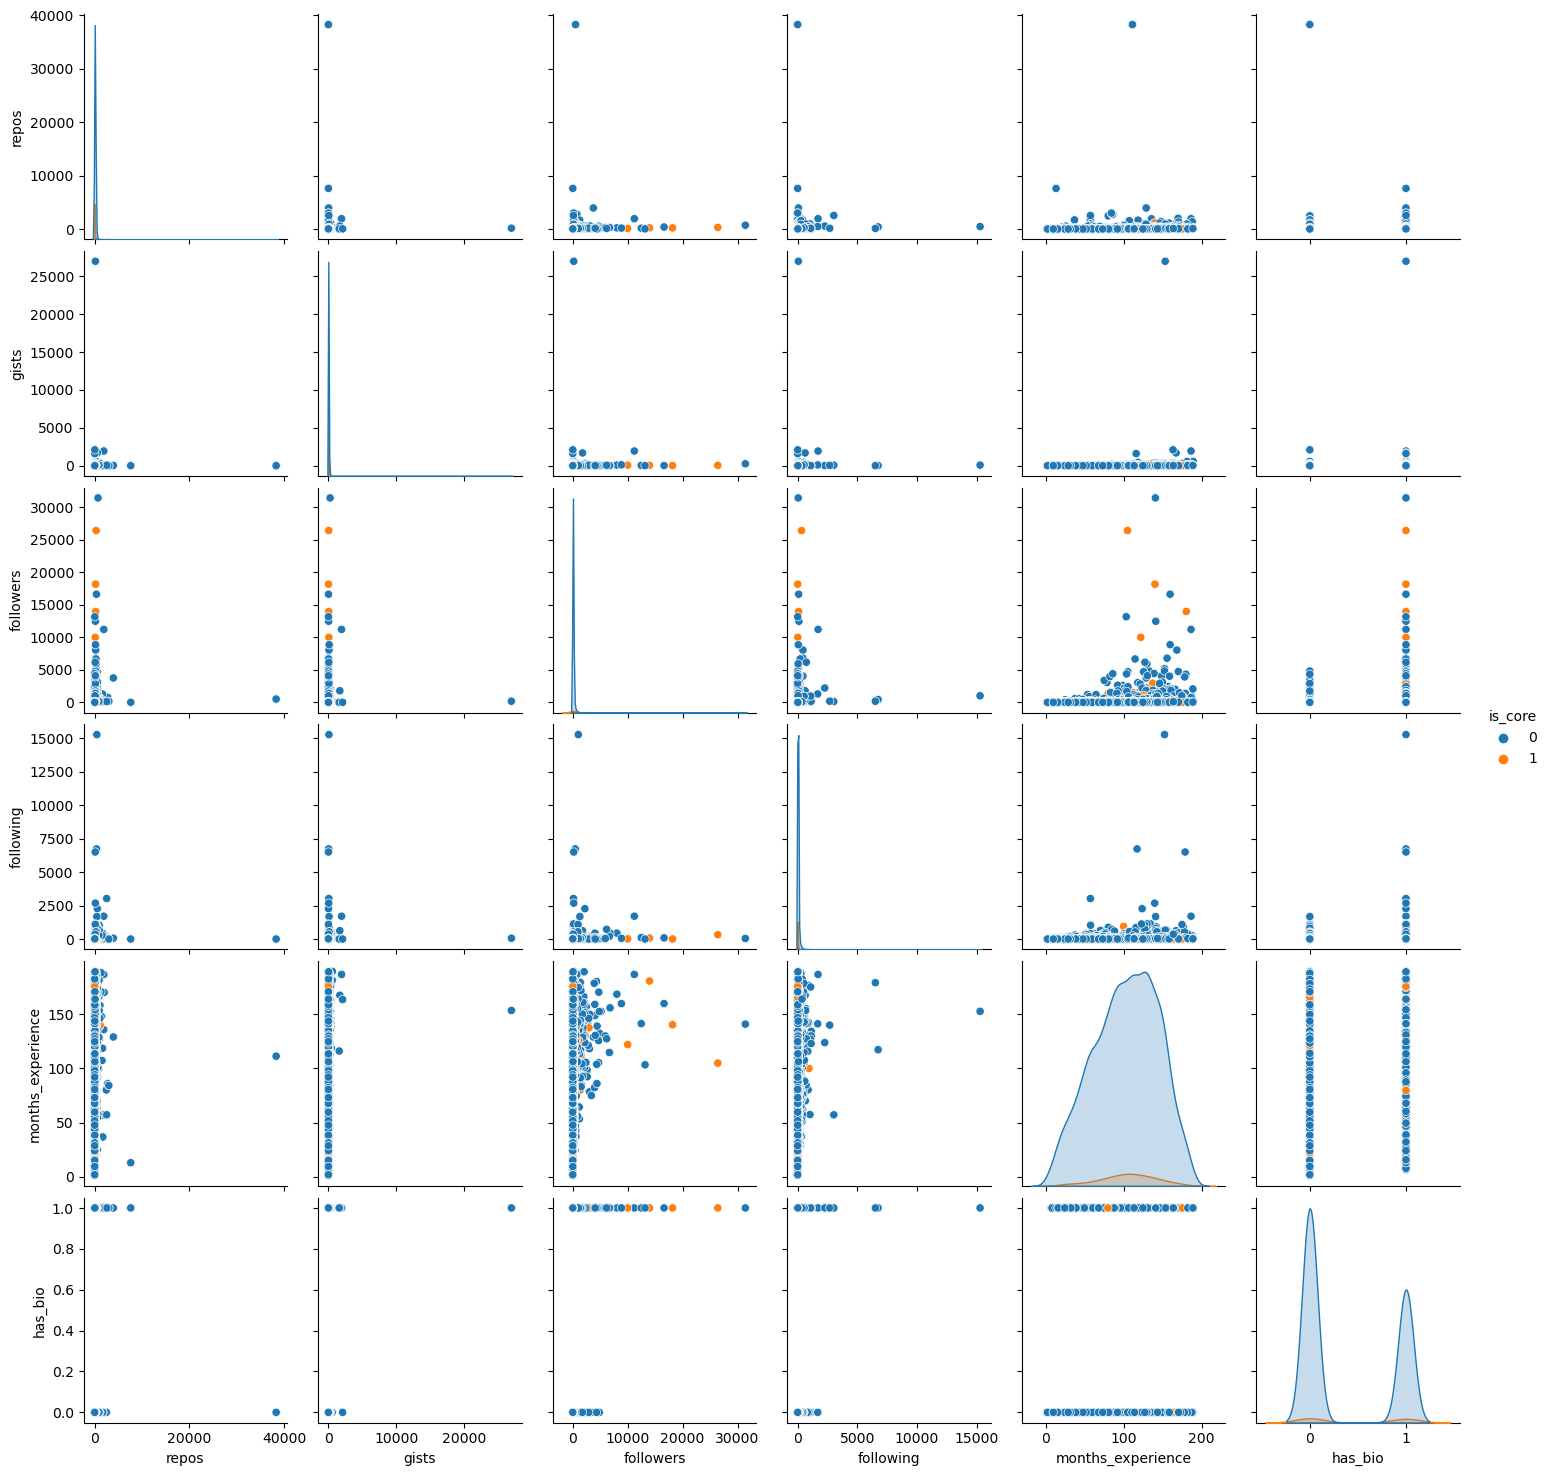

In [13]:
sns.pairplot(subset_df, hue = 'is_core')

ADASYN pairplot

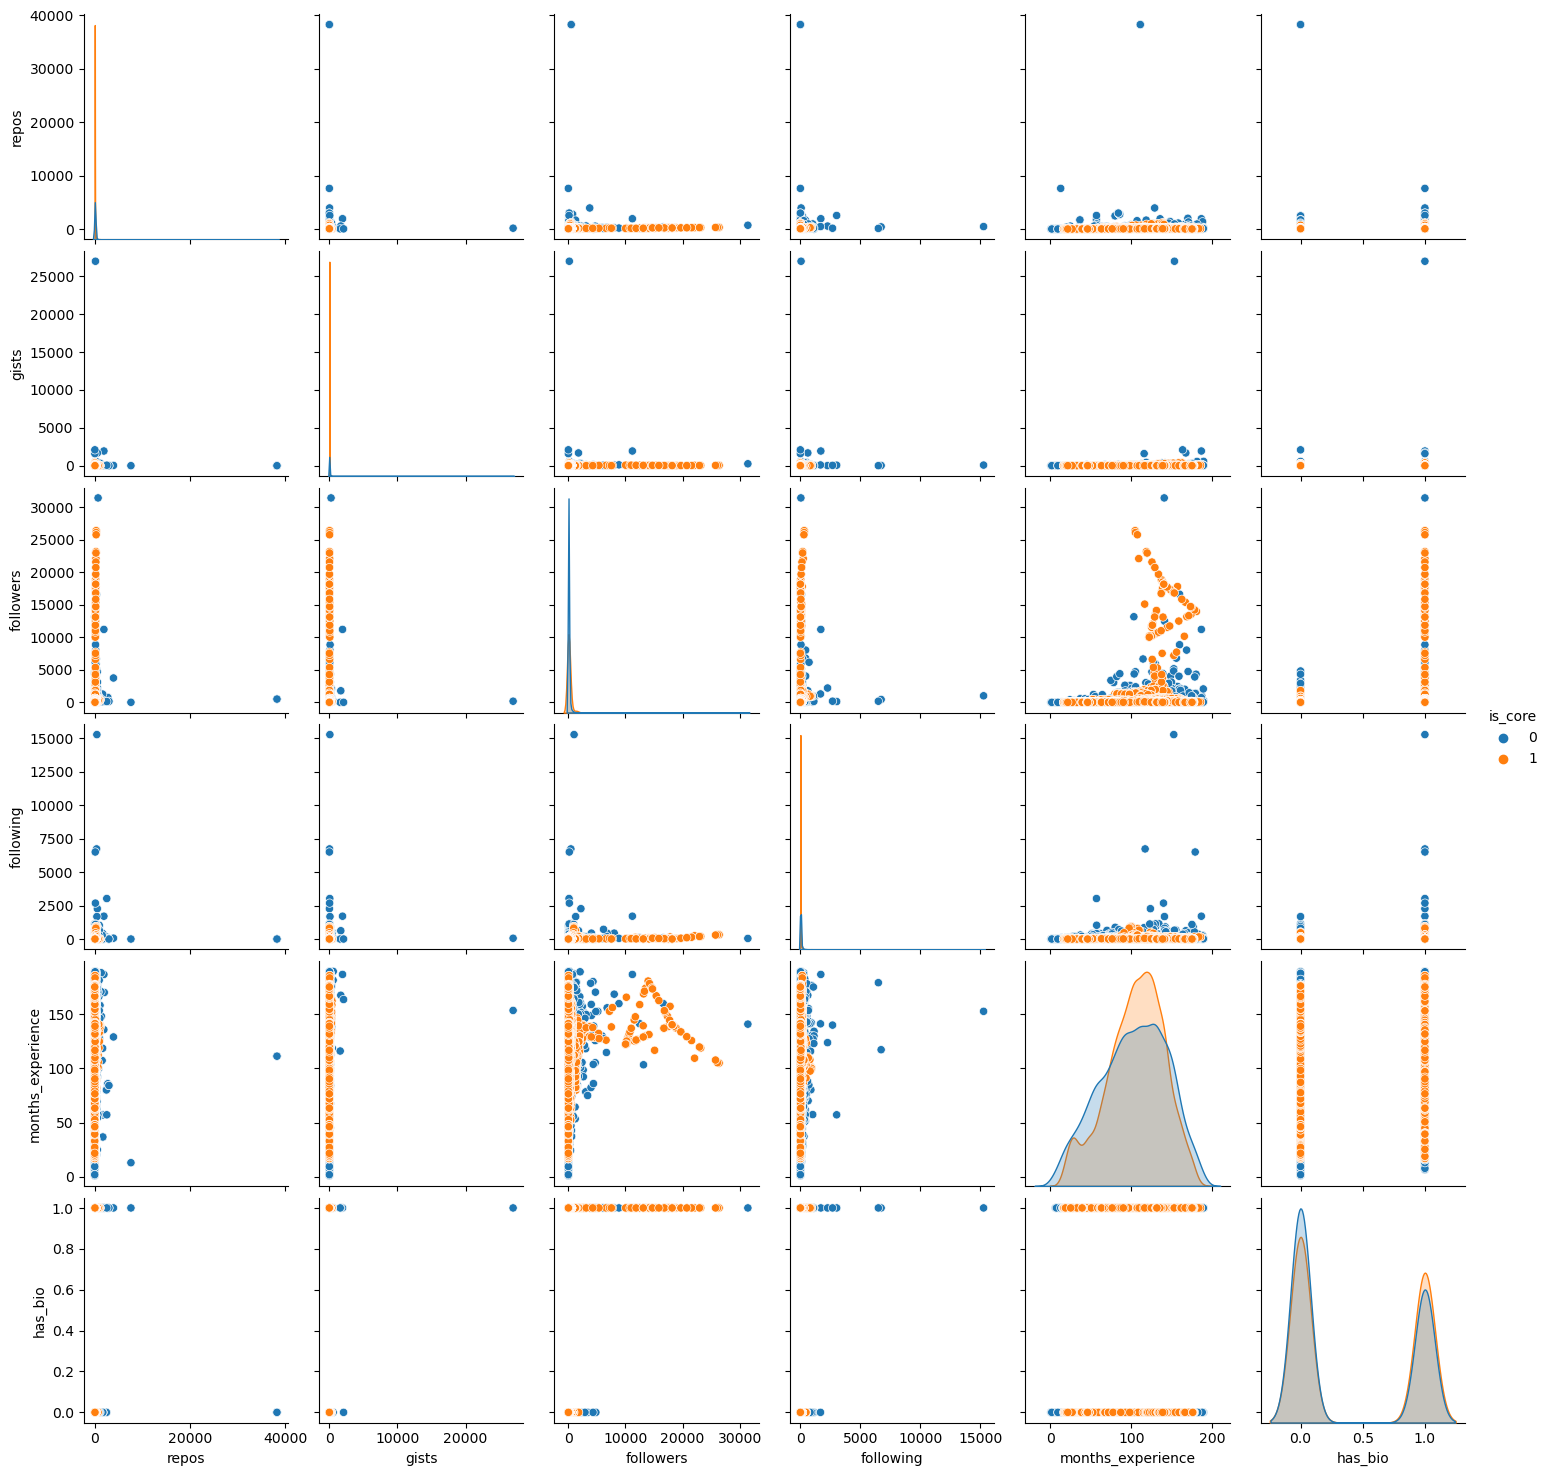

In [14]:
sns.pairplot(df_resampled_adasyn, hue = 'is_core')

SMOTE pairplot

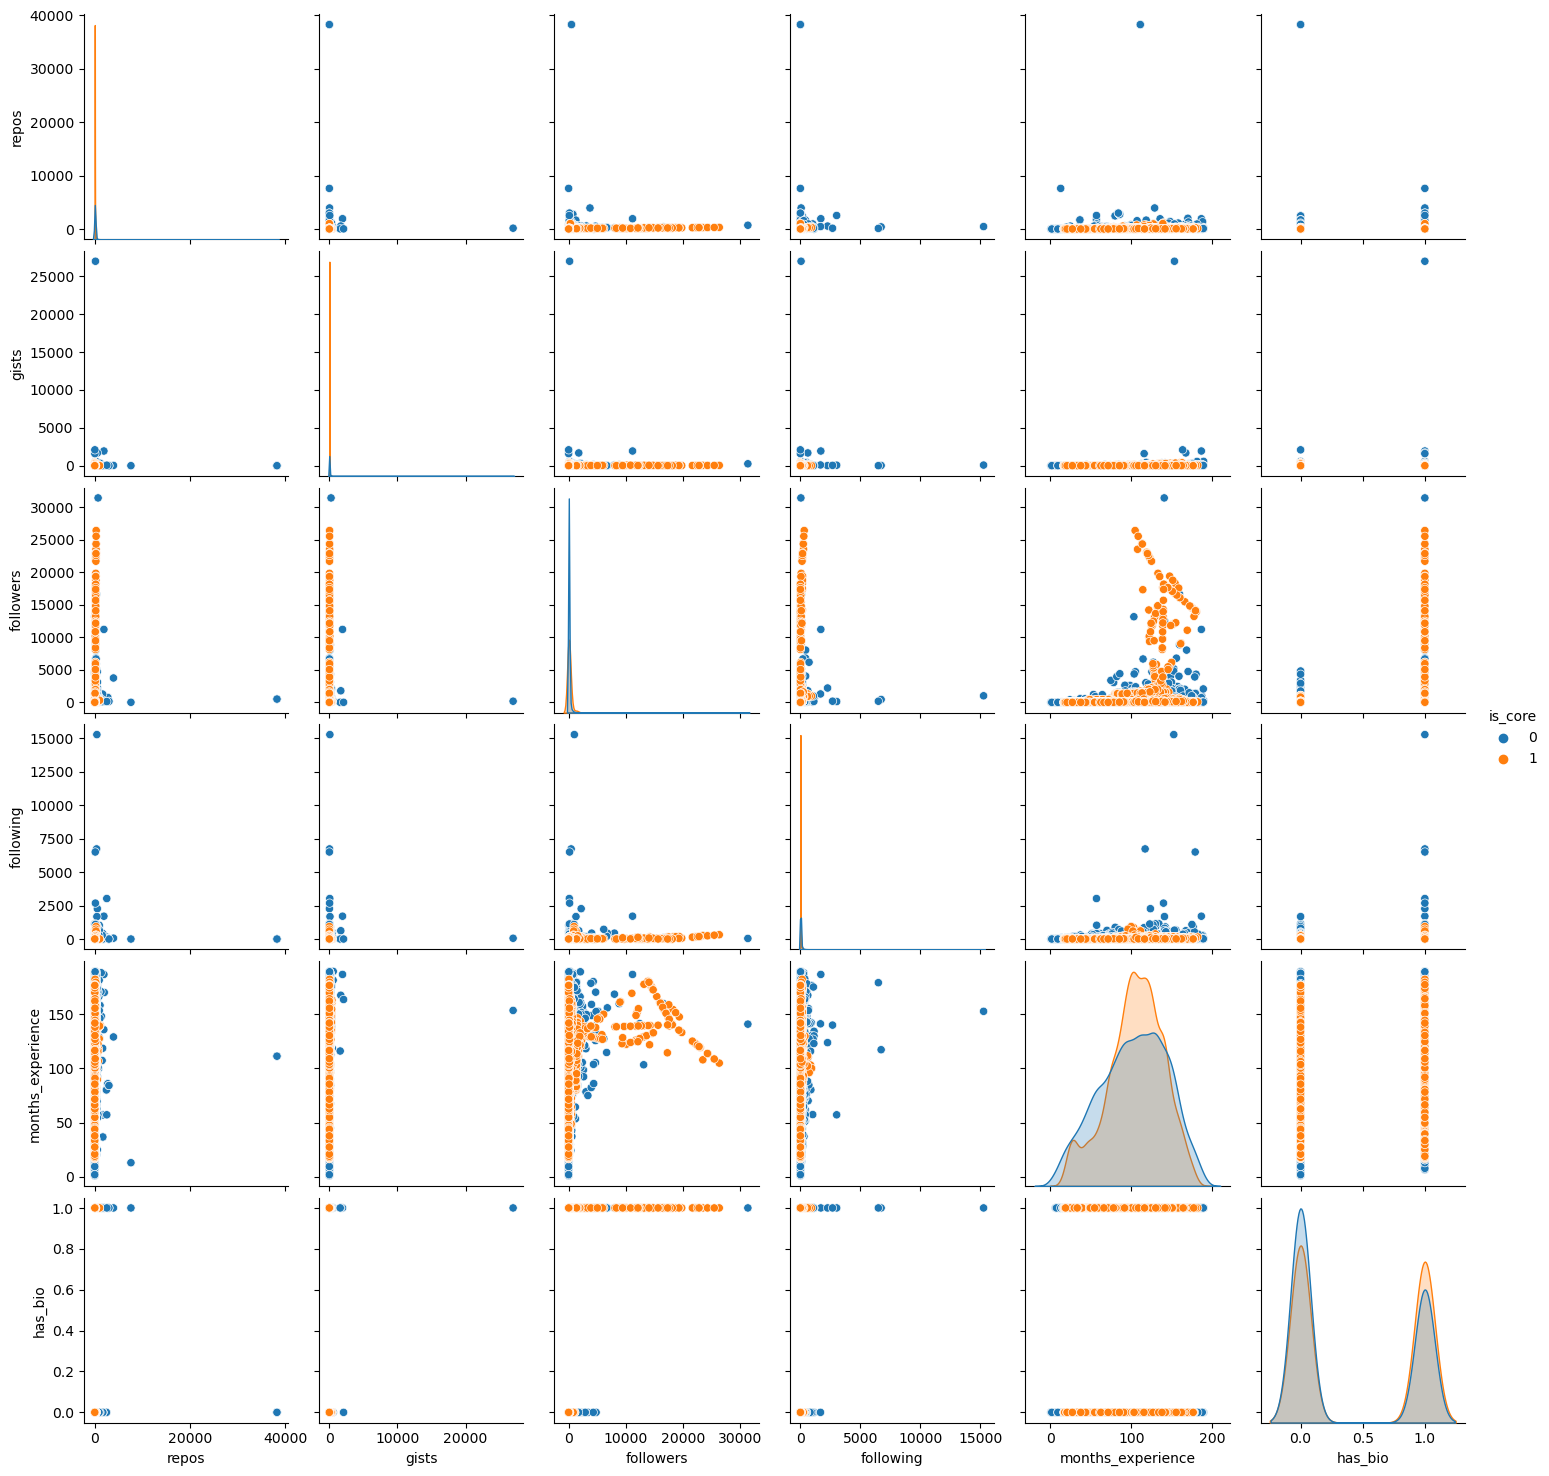

In [15]:
sns.pairplot(df_resampled_smnc, hue = 'is_core')

Borderline SMOTE pairplot

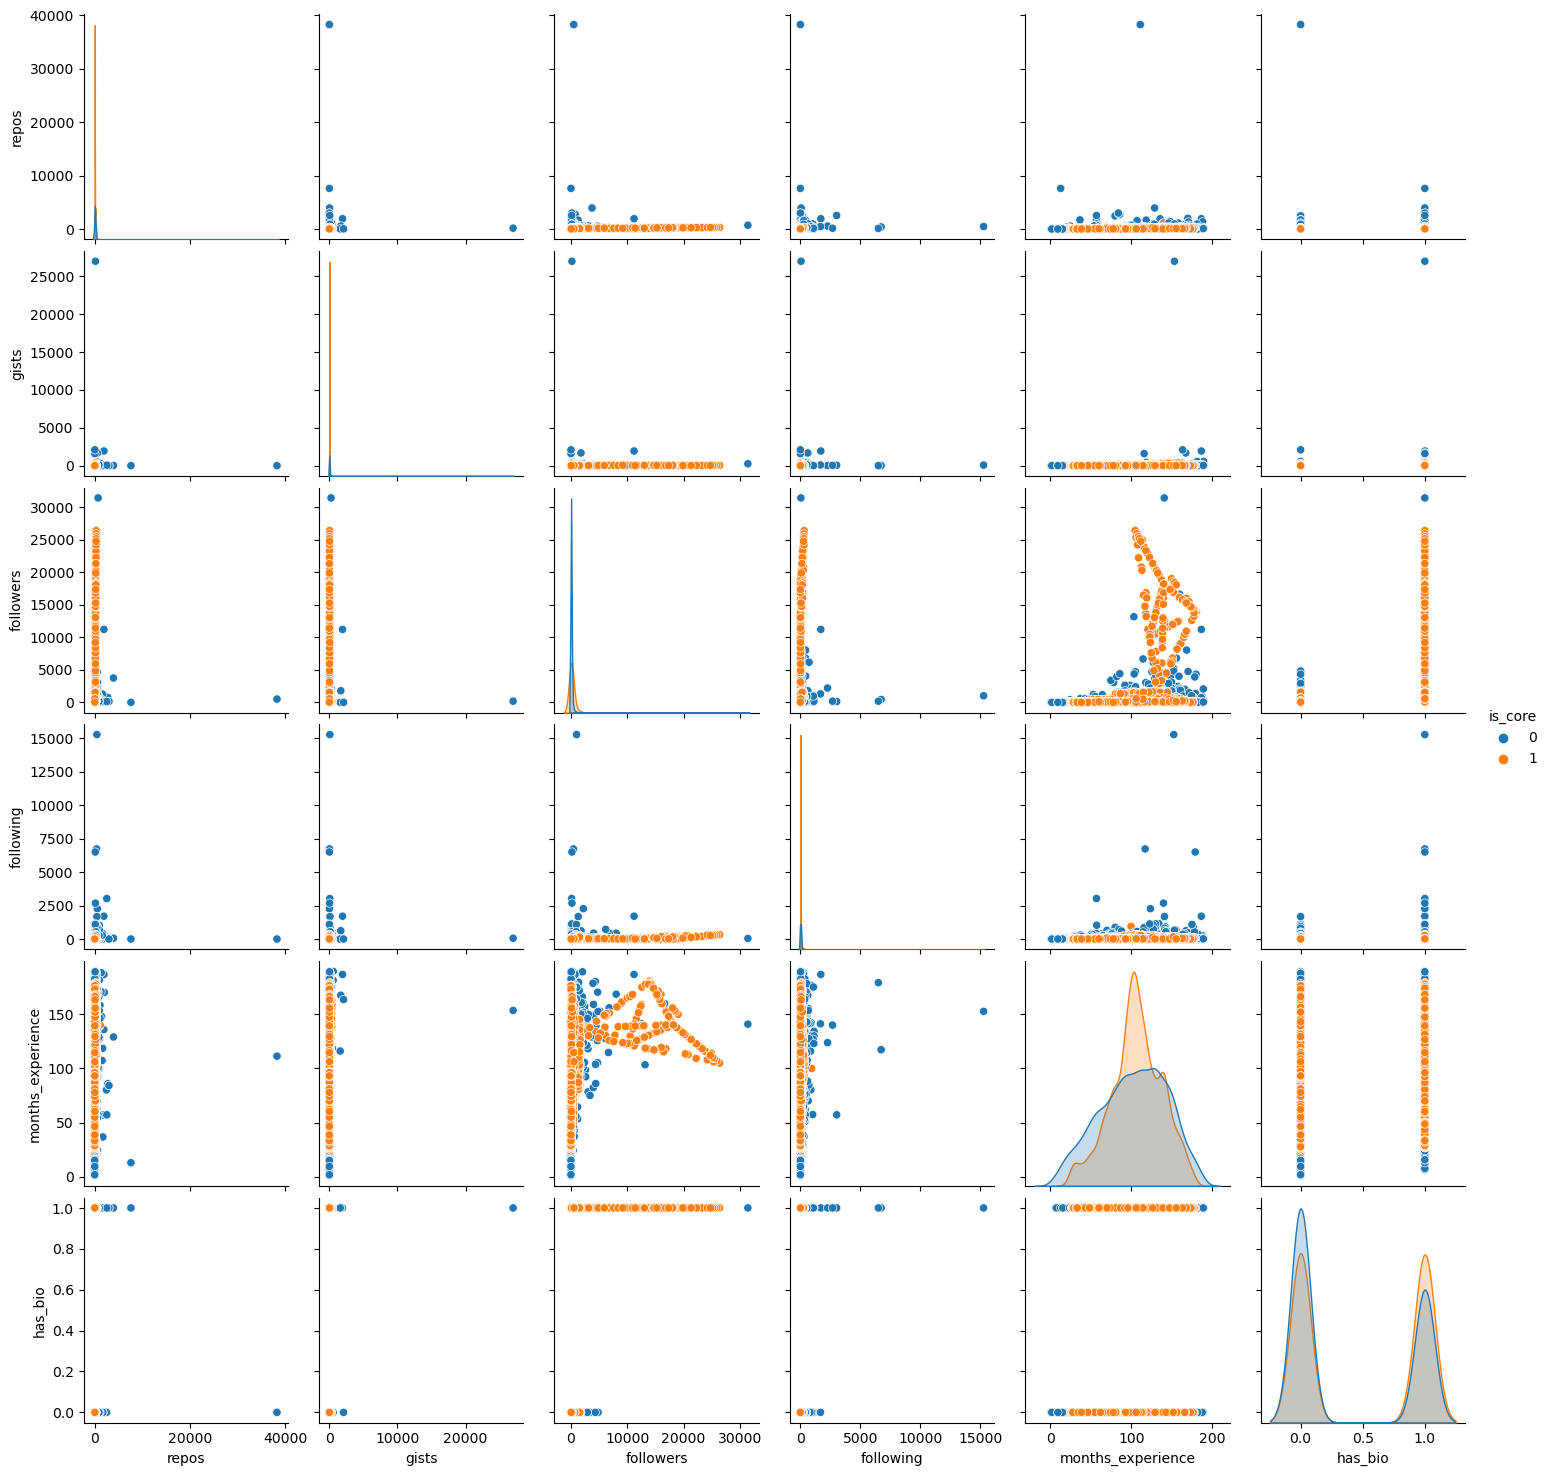

In [16]:
sns.pairplot(df_resampled_border, hue = 'is_core')

Base correlation matrix

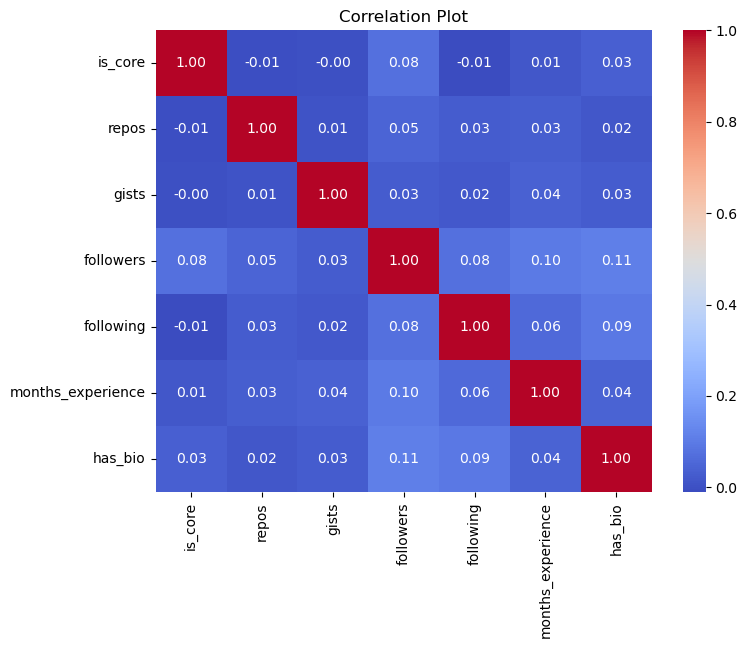

In [17]:
# Calculating the correlation matrix
correlation_matrix = subset_df.corr()

# Creating a correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Adding a title
plt.title('Correlation Plot')

# Displaying the plot
plt.show()

ADASYN correlation matrix

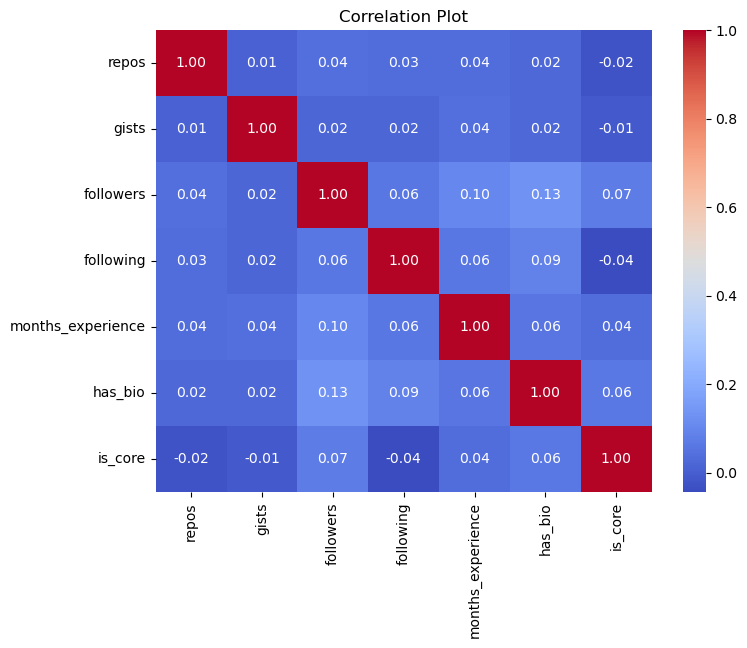

In [18]:
# Calculating the correlation matrix
correlation_matrix = df_resampled_adasyn.corr()

# Creating a correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Adding a title
plt.title('Correlation Plot')

# Displaying the plot
plt.show()

SMOTE correlation matrix

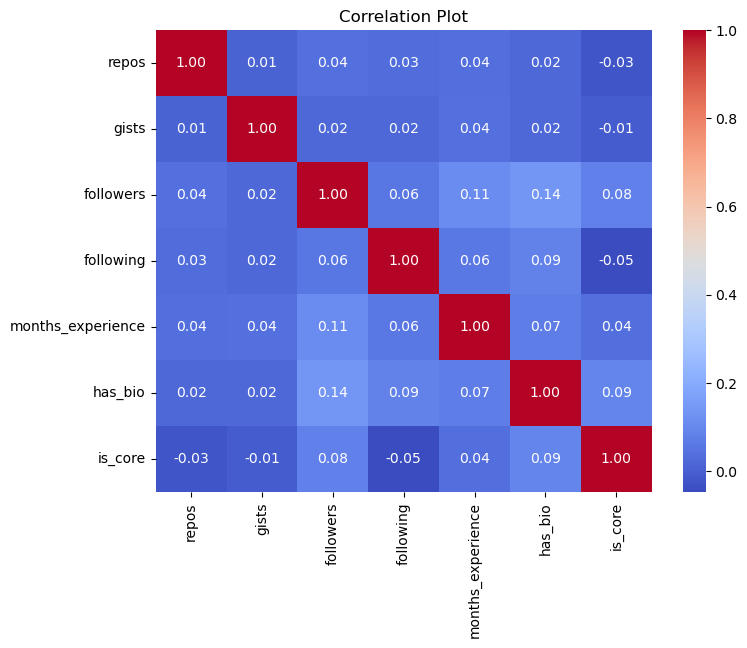

In [19]:
# Calculating the correlation matrix
correlation_matrix = df_resampled_smnc.corr()

# Creating a correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Adding a title
plt.title('Correlation Plot')

# Displaying the plot
plt.show()

SMOTE borderline correlation matrix

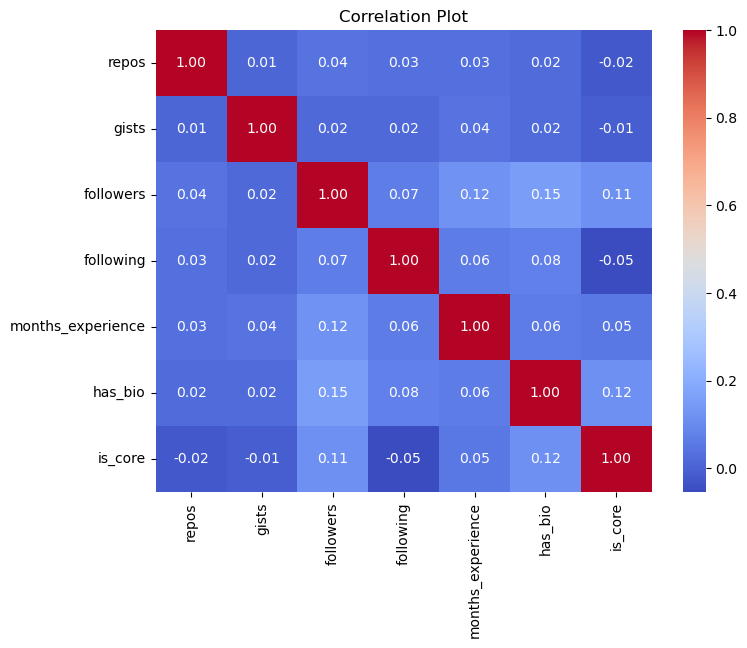

In [20]:
# Calculating the correlation matrix
correlation_matrix = df_resampled_border.corr()

# Creating a correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Adding a title
plt.title('Correlation Plot')

# Displaying the plot
plt.show()

## Mutual information examples

In [21]:
X = subset_df.drop('is_core', axis=1)
y = subset_df['is_core']

# Calculating mutual information for each feature
mi_scores = mutual_info_classif(X, y)  # For classification tasks


# Displaying the mutual information scores
for feature, score in zip(X.columns, mi_scores):
    print(f"{feature}: {score:.4f}")

repos: 0.0000
gists: 0.0000
followers: 0.0064
following: 0.0000
months_experience: 0.0005
has_bio: 0.0017


In [22]:
X = df_resampled_adasyn.drop('is_core', axis=1)
y = df_resampled_adasyn['is_core']

# Calculating mutual information for each feature
mi_scores = mutual_info_classif(X, y)  # For classification tasks


# Displaying the mutual information scores
for feature, score in zip(X.columns, mi_scores):
    print(f"{feature}: {score:.4f}")

repos: 0.4779
gists: 0.3060
followers: 0.4524
following: 0.3967
months_experience: 0.0398
has_bio: 0.0048


In [23]:
X = df_resampled_smnc.drop('is_core', axis=1)
y = df_resampled_smnc['is_core']

# Calculating mutual information for each feature
mi_scores = mutual_info_classif(X, y)  # For classification tasks


# Displaying the mutual information scores
for feature, score in zip(X.columns, mi_scores):
    print(f"{feature}: {score:.4f}")

repos: 0.4819
gists: 0.3077
followers: 0.4607
following: 0.3929
months_experience: 0.0422
has_bio: 0.0000


In [24]:
X = df_resampled_border.drop('is_core', axis=1)
y = df_resampled_border['is_core']

# Calculating mutual information for each feature
mi_scores = mutual_info_classif(X, y)  # For classification tasks


# Displaying the mutual information scores
for feature, score in zip(X.columns, mi_scores):
    print(f"{feature}: {score:.4f}")

repos: 0.4797
gists: 0.3106
followers: 0.4782
following: 0.3968
months_experience: 0.0624
has_bio: 0.0082


## Distribution tests between orginal and newly generated

two sample kolmogorov-smirnov test (same distribution)

In [25]:
ks_adasyn = []
p_adasyn = []
ks_smnc = []
p_smnc =[]
ks_border = []
p_border = []
for i in range(5):
    x = subset_df.iloc[:, i+1]
    y1 = df_resampled_adasyn.iloc[:,i]
    y2 = df_resampled_smnc.iloc[:,i]
    y3 = df_resampled_border.iloc[:,i]
    
    ks_stat1, ks_pvalue1 = ks_2samp(x, y1)
    ks_stat2, ks_pvalue2 = ks_2samp(x, y2)
    ks_stat3, ks_pvalue3 = ks_2samp(x, y3)
    
    ks_adasyn.append(ks_stat1)
    ks_smnc.append(ks_stat2)
    ks_border.append(ks_stat3)
    
    p_adasyn.append(ks_pvalue1)
    p_smnc.append(ks_pvalue2)
    p_border.append(ks_pvalue3)

In [26]:
for i in range(len(p_adasyn)):
    print(p_border[i] < 0.05)

True
True
True
True
True


In [27]:
for i in range(len(p_smnc)):
    print(p_border[i] < 0.05)

True
True
True
True
True


In [28]:
for i in range(len(p_border)):
    print(p_border[i] < 0.05)

True
True
True
True
True


Sufficient evidence exists to suggest that all oversampling methods deviate from the original distribution

In [29]:
for i in range(len(ks_adasyn)):
    cur = [ks_adasyn[i], ks_smnc[i], ks_border[i]]
    print(cur.index(min(cur)))

0
0
0
1
0


Checking the KS values shows that ADASYN oversampling tends to deviate the smallest amount between distributions

In [30]:
df_resampled_adasyn

repos      gists    followers  following  months_experience  \
0       90.000000   5.000000   450.000000  67.000000         115.450000   
1       88.000000  14.000000  2685.000000   7.000000         151.540000   
2      102.000000  72.000000    42.000000   0.000000         166.860000   
3       37.000000  15.000000    11.000000  10.000000         152.460000   
4       50.000000   1.000000    58.000000  17.000000         137.500000   
...           ...        ...          ...        ...                ...   
16086   45.815178   1.850284    14.207021   0.000000         131.547511   
16087   56.545011   6.008184    10.760230   0.495908         138.080589   
16088   42.233186   3.406034     7.507542   1.796983         141.073061   
16089   61.452469   6.900449    11.875561   0.049776         137.054484   
16090   53.479626   5.450841    10.063551   0.774579         138.721533   

       has_bio  is_core  
0            1        0  
1            1        0  
2            0        0  
3            1        0  
4            1        0  
...        ...      ...  
16086        1        1  
16087        0        1  
16088        0        1  
16089        0        1  
16090        0        1  

[16091 rows x 7 columns]

In [31]:
subset_df

is_core  repos  gists  followers  following  months_experience  has_bio
0           0     90      5        450         67             115.45        1
1           0     88     14       2685          7             151.54        1
2           0    102     72         42          0             166.86        0
3           0     37     15         11         10             152.46        1
4           0     50      1         58         17             137.50        1
...       ...    ...    ...        ...        ...                ...      ...
8439        0     19      0          5          1             126.98        0
8440        0      0      0          0          0              28.65        0
8441        0      1      1         13          3             124.58        1
8442        0      0      0          0          0               9.54        0
8443        0     26      0          6         16             113.27        1

[8444 rows x 7 columns]

# Cluster analysis

In [32]:
df1 = pd.read_csv("contributors2.csv")

## Cluster 2

In [33]:
c2_cols = ['microsoft/azuredatastudio', 'xamarin/xamarin-macios', 'pingcap/docs']

# Filtering rows where 'Name' is in the include_list
filtered_c2 = df1[df1['name_with_owner'].isin(c2_cols)]
selected_columns = ['is_core', 'repos', 'gists', 'followers', 'following', 'months_experience', 'has_bio']
# Subset the DataFrame based on the selected columns
c2 = filtered_c2[selected_columns]

In [34]:
c2

is_core  repos  gists  followers  following  months_experience  has_bio
15          0     68      2        167         87              97.59        1
42          0  38287      0        503          0             111.12        0
116         0   2749      0        747          8              85.70        1
142         0     12      1          5          2              45.65        0
199         0     16      0         79         27              97.63        1
...       ...    ...    ...        ...        ...                ...      ...
7329        0     26      0         37         49             105.15        0
7330        0      6      0          0          0             109.57        0
7331        0     95     10         28         22              90.98        1
7332        0     27      0         30         93              85.10        0
7333        0      6      0          2          1              53.70        0

[593 rows x 7 columns]

In [35]:
print(c2['is_core'].value_counts())

0    551
1     42
Name: is_core, dtype: int64


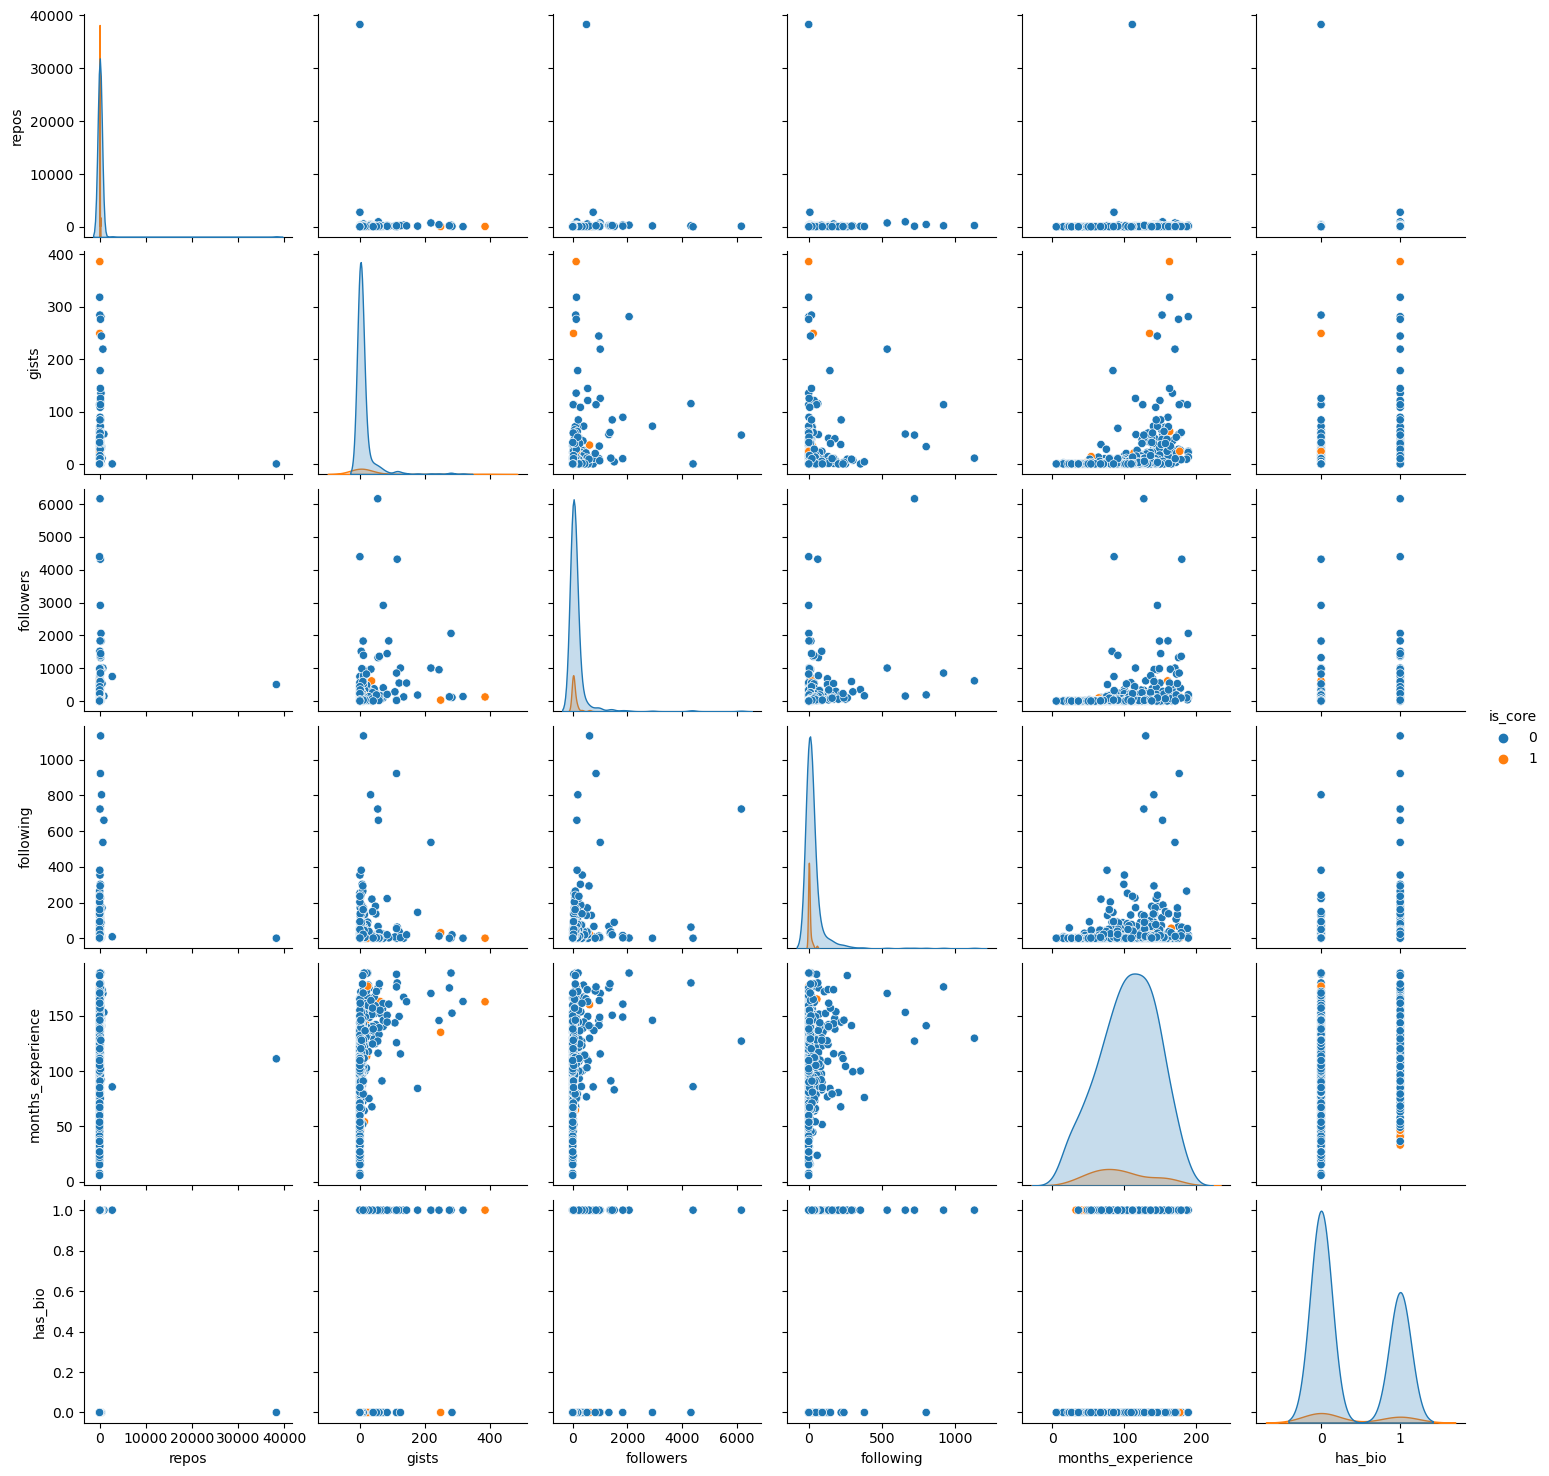

In [36]:
sns.pairplot(c2, hue = 'is_core')

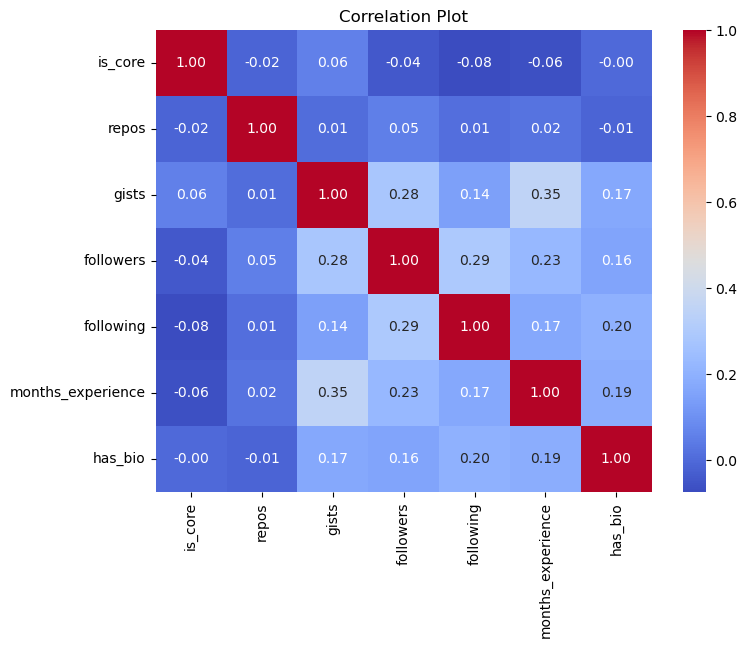

In [37]:
# Calculating the correlation matrix
correlation_matrix = c2.corr()

# Creating a correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Adding a title
plt.title('Correlation Plot')

# Displaying the plot
plt.show() 

In [38]:
x = c2.drop(columns='is_core').to_numpy()
y = c2['is_core'].to_numpy()
x_resampled_adasyn, y_resampled_adasyn = adasyn.fit_resample(x,y)
c2_adasyn = pd.DataFrame(data=x_resampled_adasyn, columns=['repos', 'gists', 'followers', 'following', 'months_experience', 'has_bio'])  # Replace column names as needed
c2_adasyn['is_core'] = y_resampled_adasyn  # Assuming 'target' is the name of your target column
c2_adasyn['has_bio'] = c2_adasyn['has_bio'].apply(lambda x: 1 if x >= 0.5 else 0)
c2_adasyn

repos      gists   followers  following  months_experience  \
0        68.000000   2.000000  167.000000  87.000000          97.590000   
1     38287.000000   0.000000  503.000000   0.000000         111.120000   
2      2749.000000   0.000000  747.000000   8.000000          85.700000   
3        12.000000   1.000000    5.000000   2.000000          45.650000   
4        16.000000   0.000000   79.000000  27.000000          97.630000   
...            ...        ...         ...        ...                ...   
1110     89.510612  35.642541  141.000000   1.000000         172.669664   
1111     58.078757  21.033753  204.279936  55.381195         165.341637   
1112    110.922547  45.813210  141.000000   1.000000         168.965399   
1113    104.687866  12.660610   84.303048   0.055051         121.517078   
1114     61.081580  22.320677  176.825551  31.787583         170.360641   

      has_bio  is_core  
0           1        0  
1           0        0  
2           1        0  
3           0        0  
4           1        0  
...       ...      ...  
1110        0        1  
1111        1        1  
1112        0        1  
1113        0        1  
1114        1        1  

[1115 rows x 7 columns]

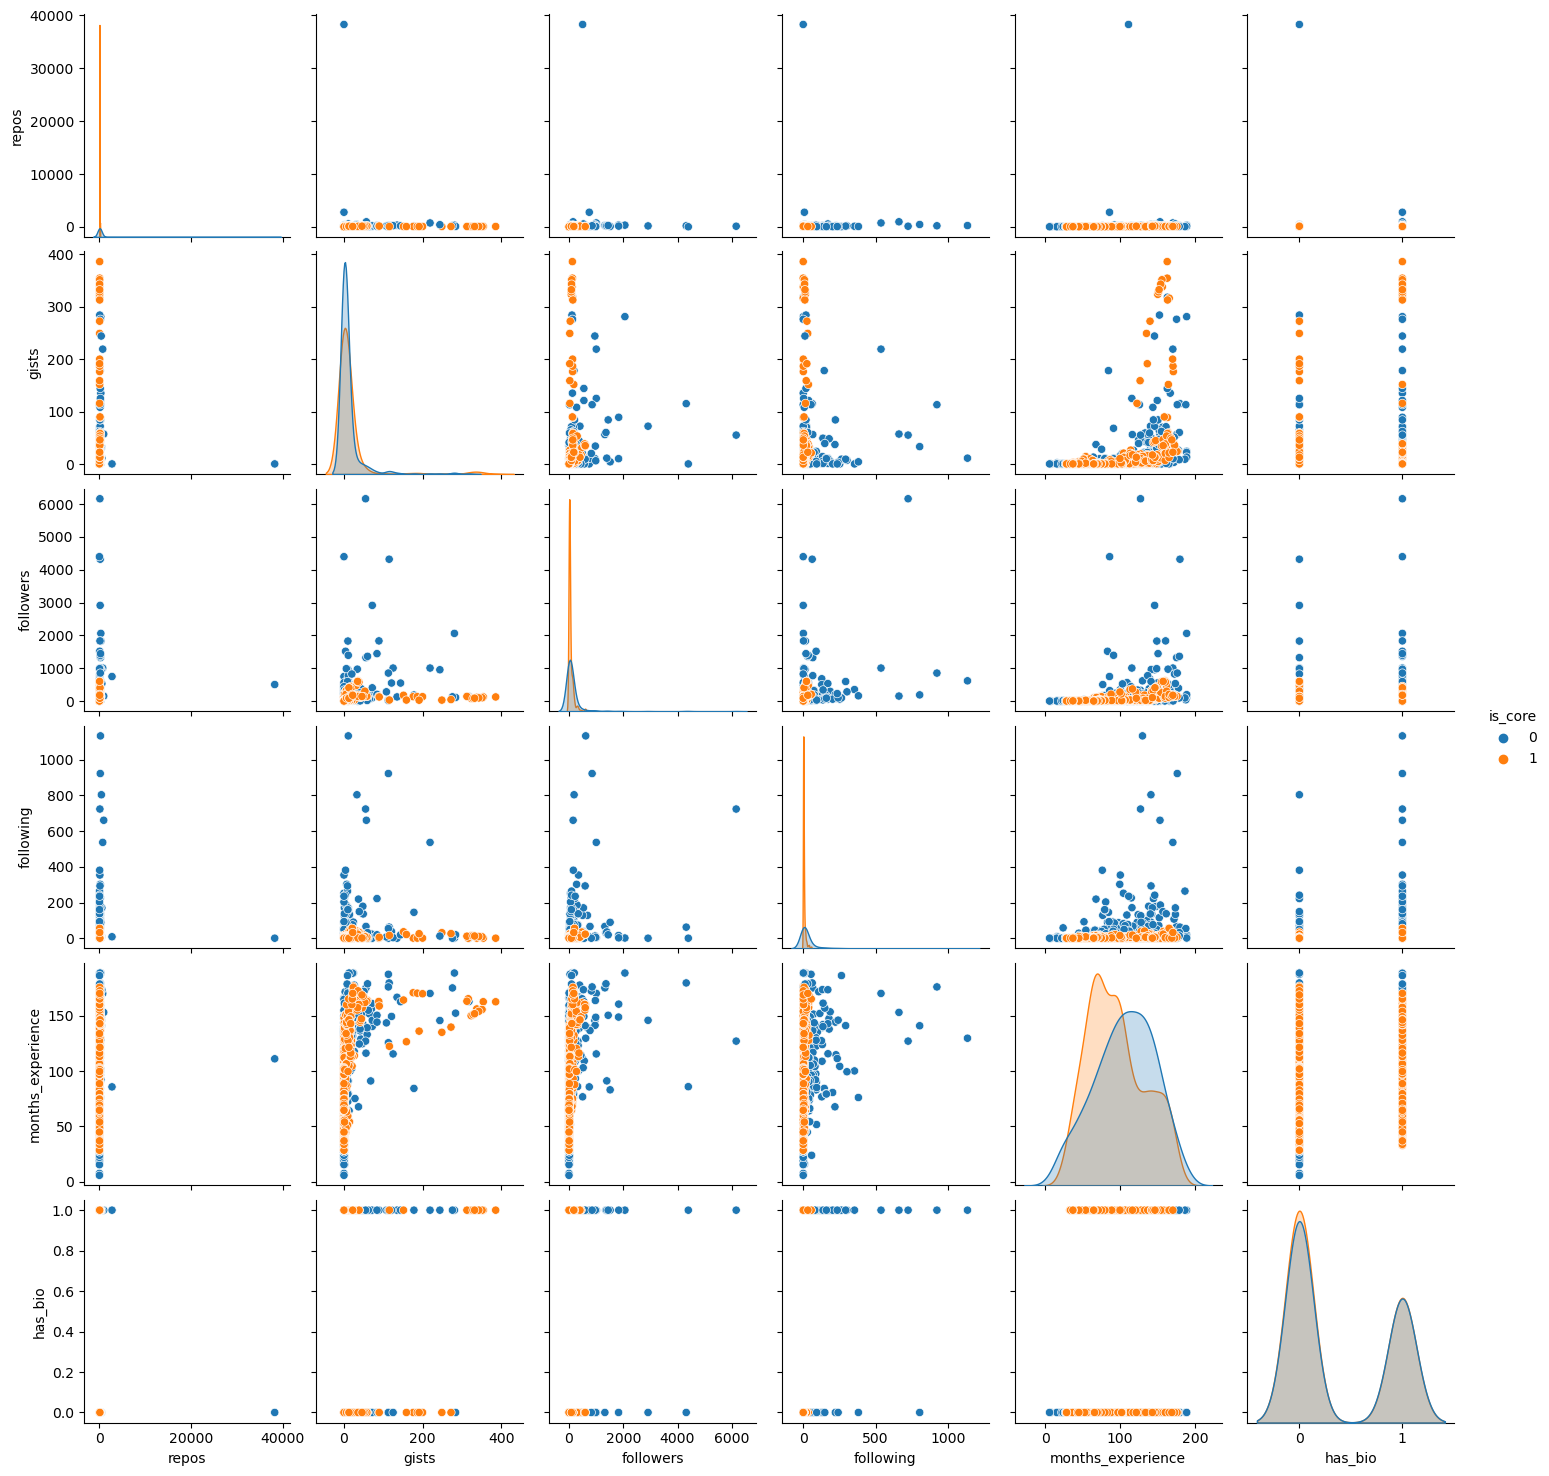

In [39]:
sns.pairplot(c2_adasyn, hue = 'is_core')

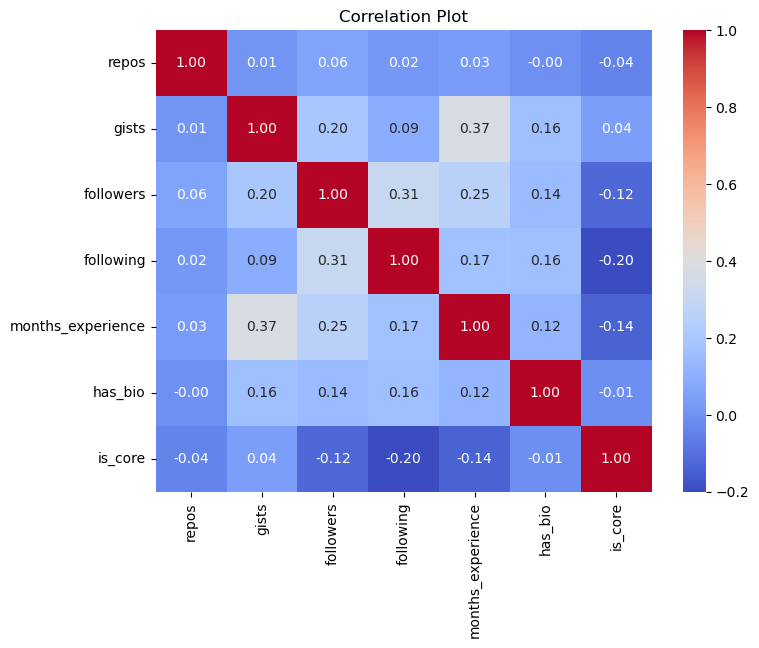

In [40]:
# Calculating the correlation matrix
correlation_matrix = c2_adasyn.corr()

# Creating a correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Adding a title
plt.title('Correlation Plot')

# Displaying the plot
plt.show() 

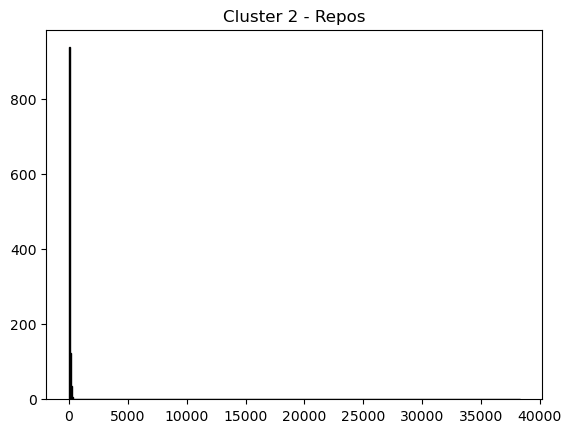

In [41]:
plt.hist(c2_adasyn.repos, bins=500, edgecolor='black')
plt.title('Cluster 2 - Repos')
plt.show()

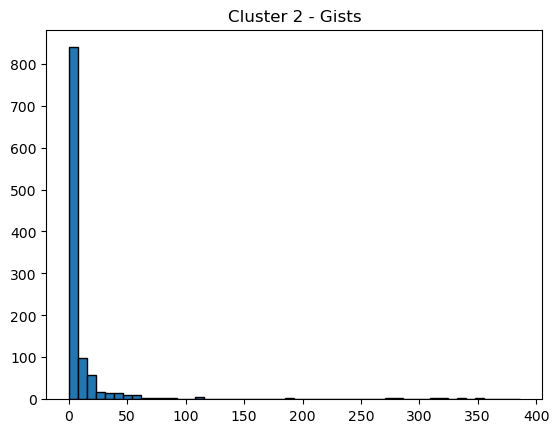

In [42]:
plt.hist(c2_adasyn.gists, bins=50, edgecolor='black')
plt.title('Cluster 2 - Gists')
plt.show()

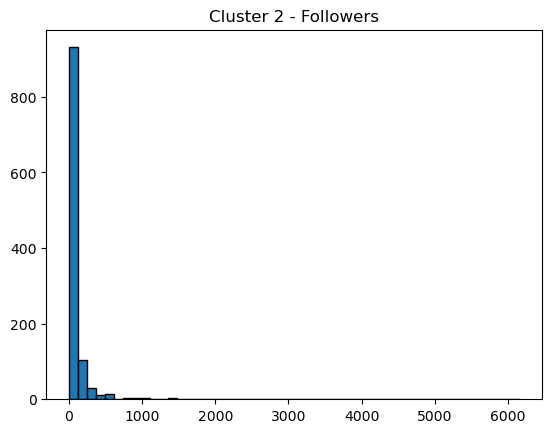

In [43]:
plt.hist(c2_adasyn.followers, bins=50, edgecolor='black')
plt.title('Cluster 2 - Followers')
plt.show()

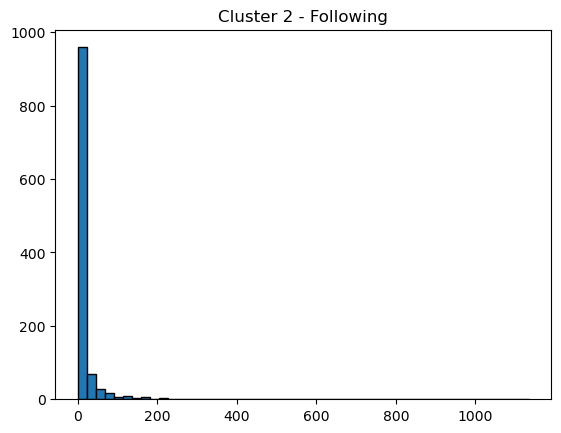

In [44]:
plt.hist(c2_adasyn.following, bins=50, edgecolor='black')
plt.title('Cluster 2 - Following')
plt.show()

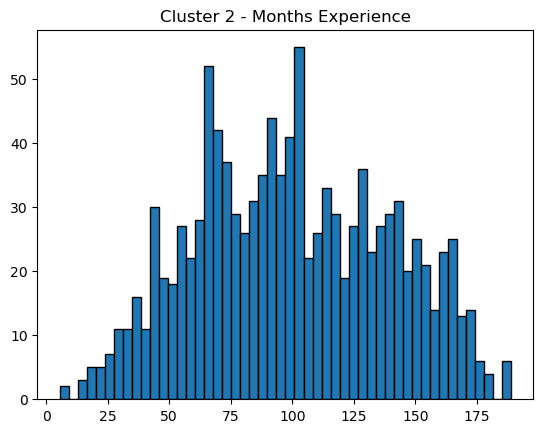

In [45]:
plt.hist(c2_adasyn.months_experience, bins=50, edgecolor='black')
plt.title('Cluster 2 - Months Experience')
plt.show()

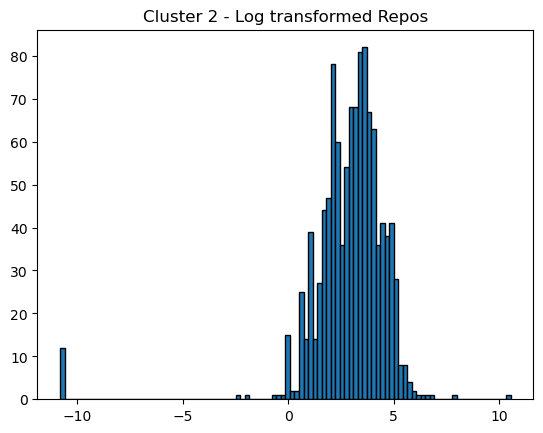

In [46]:
plt.hist(np.log(c2_adasyn.repos+2e-5), bins=100, edgecolor='black')
plt.title('Cluster 2 - Log transformed Repos')
plt.show()

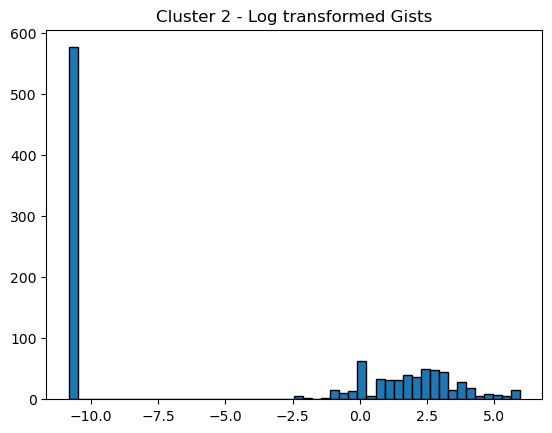

In [47]:
plt.hist(np.log(c2_adasyn.gists+2e-5), bins=50, edgecolor='black')
plt.title('Cluster 2 - Log transformed Gists')
plt.show()

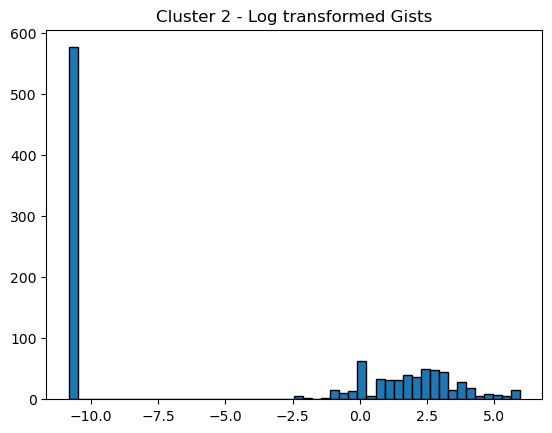

In [48]:
plt.hist(np.log(c2_adasyn.gists+2e-5), bins=50, edgecolor='black')
plt.title('Cluster 2 - Log transformed Gists')
plt.show()

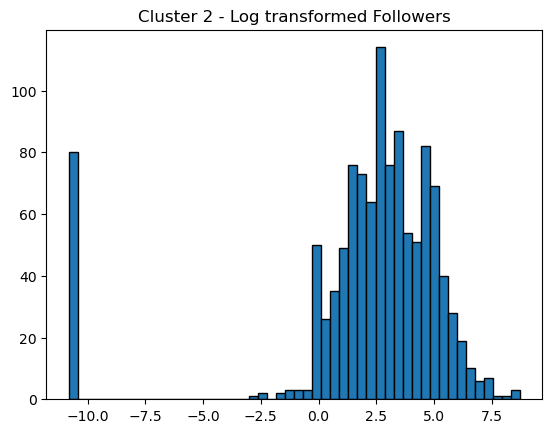

In [49]:
plt.hist(np.log(c2_adasyn.followers+2e-5), bins=50, edgecolor='black')
plt.title('Cluster 2 - Log transformed Followers')
plt.show()

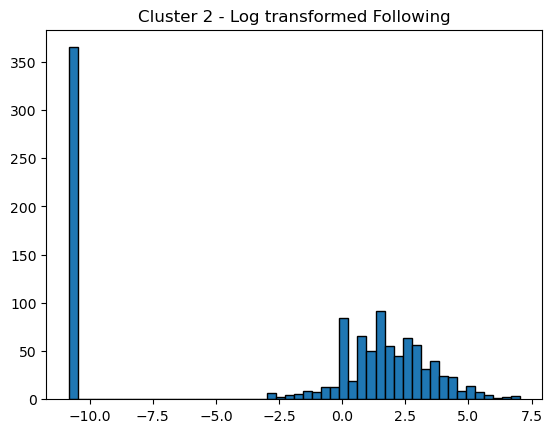

In [50]:
plt.hist(np.log(c2_adasyn.following+2e-5), bins=50, edgecolor='black')
plt.title('Cluster 2 - Log transformed Following')
plt.show()

In [51]:
c2_adasyn_log = c2_adasyn.copy()
c2_adasyn_log['repos'] = np.log(c2_adasyn_log.repos+2e-5)
c2_adasyn_log['gists'] = np.log(c2_adasyn_log.gists+2e-5)
c2_adasyn_log['followers'] = np.log(c2_adasyn_log.followers+2e-5)
c2_adasyn_log['following'] = np.log(c2_adasyn_log.following+2e-5)
c2_adasyn_log

repos      gists  followers  following  months_experience  has_bio  \
0      4.219508   0.693157   5.117994   4.465908          97.590000        1   
1     10.552866 -10.819778   6.220590 -10.819778         111.120000        0   
2      7.918992 -10.819778   6.616065   2.079444          85.700000        1   
3      2.484908   0.000020   1.609442   0.693157          45.650000        0   
4      2.772590 -10.819778   4.369448   3.295838          97.630000        1   
...         ...        ...        ...        ...                ...      ...   
1110   4.494357   3.573540   4.948760   0.000020         172.669664        0   
1111   4.061800   3.046129   5.319491   4.014240         165.341637        1   
1112   4.708832   3.824573   4.948760   0.000020         168.965399        0   
1113   4.650983   2.538497   4.434418  -2.899136         121.517078        0   
1114   4.112211   3.105514   5.175164   3.459076         170.360641        1   

      is_core  
0           0  
1           0  
2           0  
3           0  
4           0  
...       ...  
1110        1  
1111        1  
1112        1  
1113        1  
1114        1  

[1115 rows x 7 columns]

In [52]:
x = c2_adasyn_log.drop(columns = ['has_bio', 'is_core'])
x

repos      gists  followers  following  months_experience
0      4.219508   0.693157   5.117994   4.465908          97.590000
1     10.552866 -10.819778   6.220590 -10.819778         111.120000
2      7.918992 -10.819778   6.616065   2.079444          85.700000
3      2.484908   0.000020   1.609442   0.693157          45.650000
4      2.772590 -10.819778   4.369448   3.295838          97.630000
...         ...        ...        ...        ...                ...
1110   4.494357   3.573540   4.948760   0.000020         172.669664
1111   4.061800   3.046129   5.319491   4.014240         165.341637
1112   4.708832   3.824573   4.948760   0.000020         168.965399
1113   4.650983   2.538497   4.434418  -2.899136         121.517078
1114   4.112211   3.105514   5.175164   3.459076         170.360641

[1115 rows x 5 columns]

In [53]:
x2 = c2_adasyn_log[['has_bio', 'is_core']]
x2

has_bio  is_core
0           1        0
1           0        0
2           1        0
3           0        0
4           1        0
...       ...      ...
1110        0        1
1111        1        1
1112        0        1
1113        0        1
1114        1        1

[1115 rows x 2 columns]

In [54]:
scaler = StandardScaler()
x = scaler.fit_transform(x)
c2_adasyn_log_scaled = pd.DataFrame(x, columns=['repos', 'gists', 'followers', 'following', 'months_experience'])
c2_adasyn_log_scaled = pd.concat([c2_adasyn_log_scaled, x2], axis = 1)
c2_adasyn_log_scaled

repos     gists  followers  following  months_experience  has_bio  \
0     0.688286  0.821116   0.776725   1.113038          -0.057316        1   
1     3.962255 -0.951274   1.054573  -1.396573           0.287694        0   
2     2.600699 -0.951274   1.154231   0.721228          -0.360507        1   
3    -0.208399  0.714409  -0.107411   0.493626          -1.381768        0   
4    -0.059685 -0.951274   0.588095   0.920936          -0.056296        1   
...        ...       ...        ...        ...                ...      ...   
1110  0.830367  1.264544   0.734079   0.379827           1.857189        0   
1111  0.606760  1.183350   0.827501   1.038883           1.670327        1   
1112  0.941237  1.303190   0.734079   0.379827           1.762732        0   
1113  0.911333  1.105201   0.604467  -0.096158           0.552816        0   
1114  0.632819  1.192492   0.791131   0.947736           1.798310        1   

      is_core  
0           0  
1           0  
2           0  
3           0  
4           0  
...       ...  
1110        1  
1111        1  
1112        1  
1113        1  
1114        1  

[1115 rows x 7 columns]

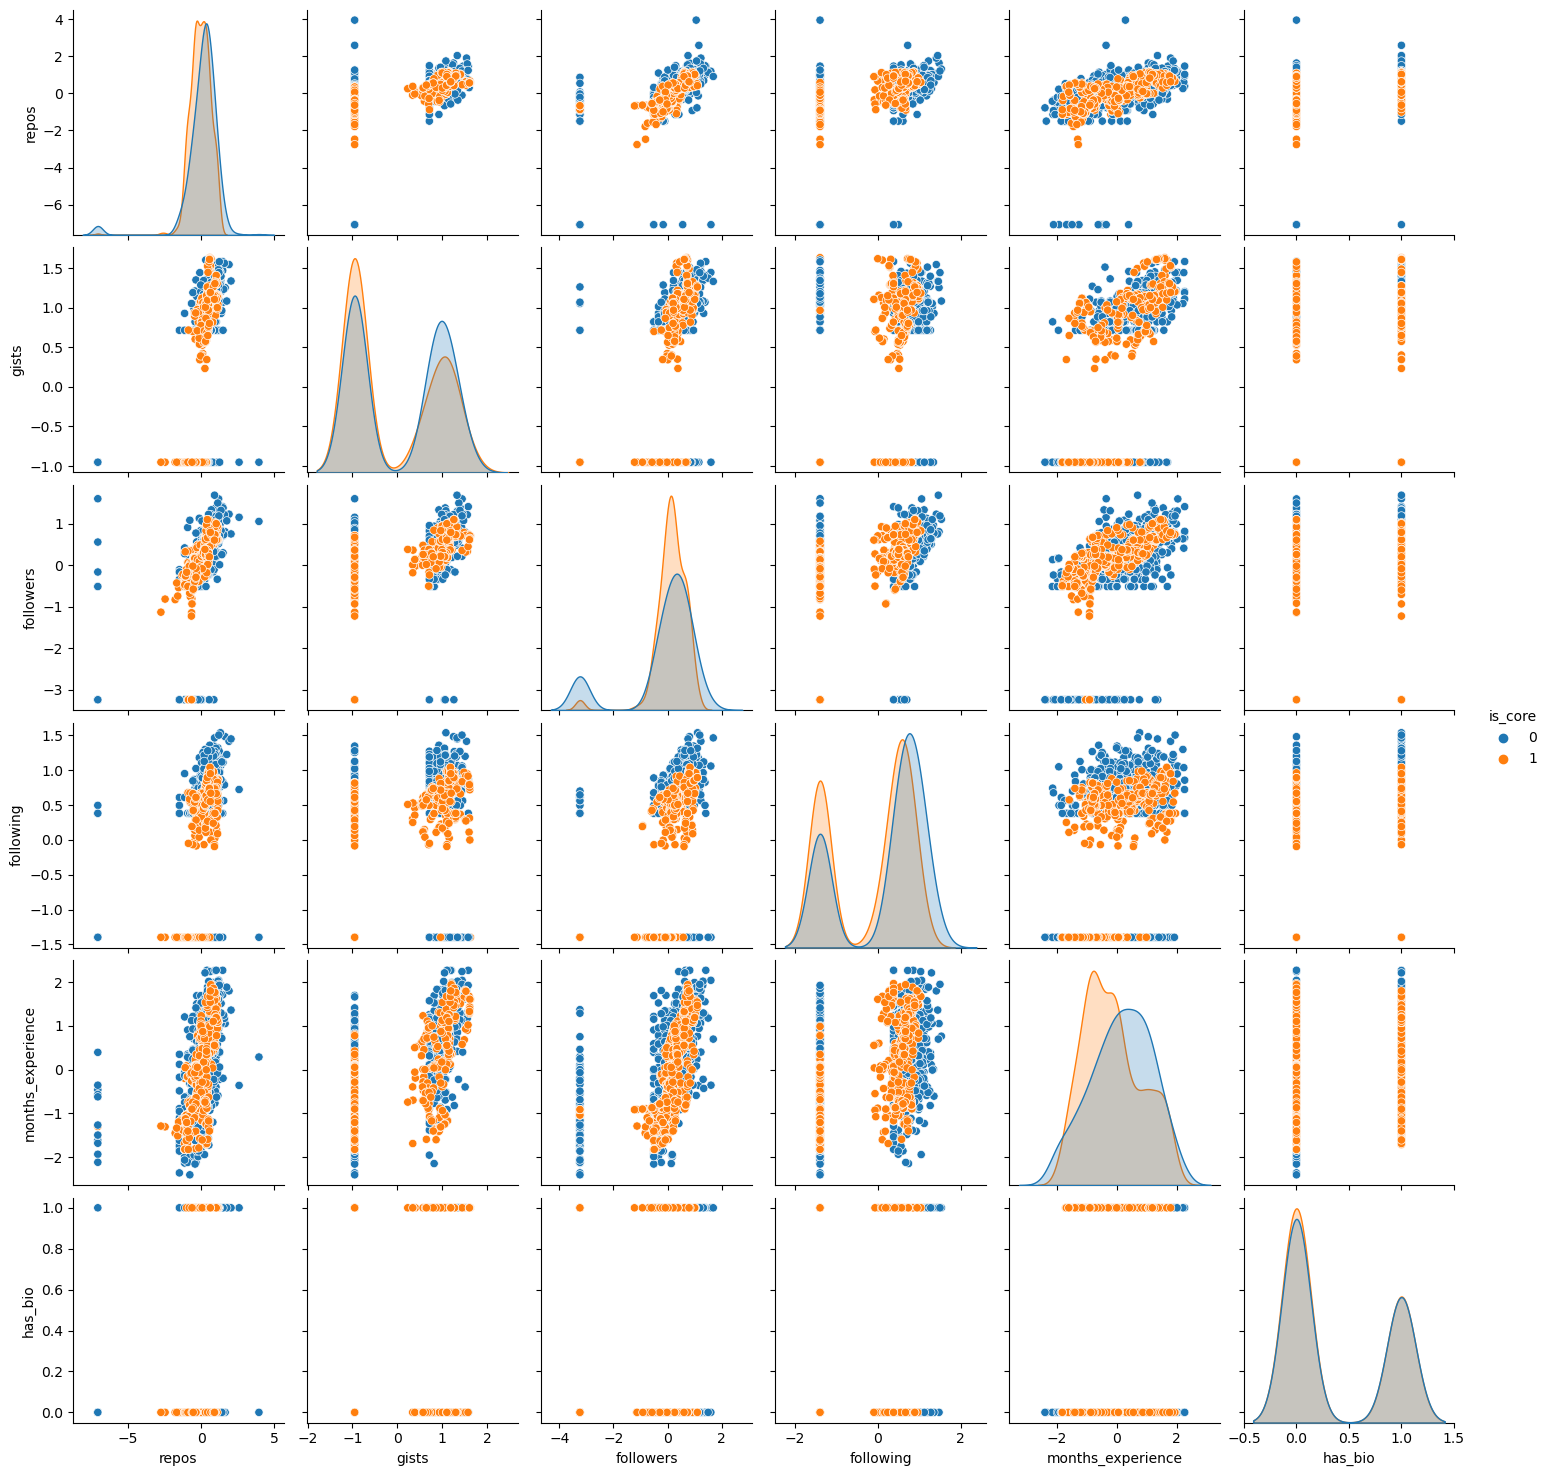

In [55]:
sns.pairplot(c2_adasyn_log_scaled, hue = 'is_core')

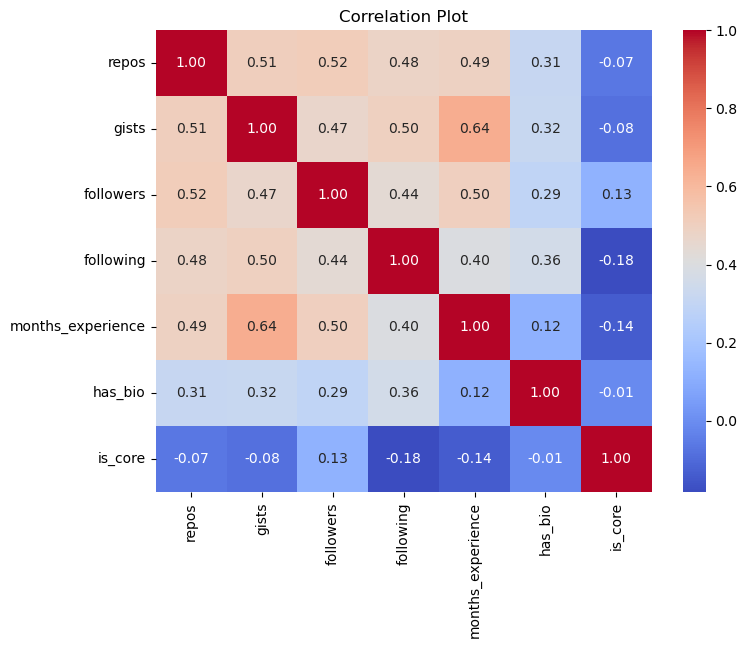

In [56]:
# Creating a correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(c2_adasyn_log_scaled.corr(), annot=True, cmap='coolwarm', fmt=".2f")

# Adding a title
plt.title('Correlation Plot')

# Displaying the plot
plt.show() 

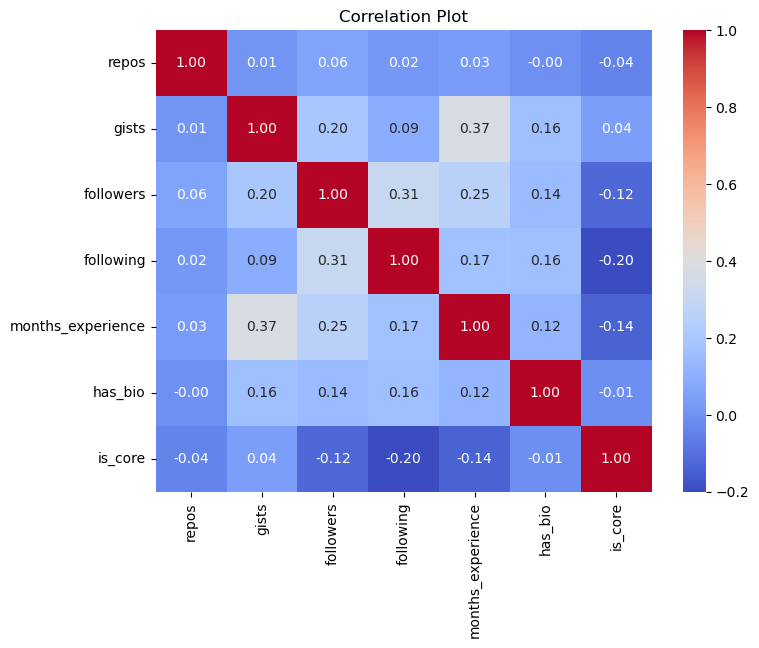

In [57]:
# Creating a correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(c2_adasyn.corr(), annot=True, cmap='coolwarm', fmt=".2f")

# Adding a title
plt.title('Correlation Plot')

# Displaying the plot
plt.show() 

In [58]:
X = c2_adasyn_log_scaled.drop('is_core', axis=1)
y = c2_adasyn_log_scaled['is_core']

# Calculating mutual information for each feature
mi_scores = mutual_info_classif(X, y)  # For classification tasks


# Displaying the mutual information scores
for feature, score in zip(X.columns, mi_scores):
    print(f"{feature}: {score:.4f}")

repos: 0.2879
gists: 0.1605
followers: 0.2825
following: 0.2700
months_experience: 0.0794
has_bio: 0.0000


In [59]:
X = c2_adasyn.drop('is_core', axis=1)
y = c2_adasyn['is_core']

# Calculating mutual information for each feature
mi_scores = mutual_info_classif(X, y)  # For classification tasks


# Displaying the mutual information scores
for feature, score in zip(X.columns, mi_scores):
    print(f"{feature}: {score:.4f}")

repos: 0.2967
gists: 0.1576
followers: 0.2774
following: 0.2597
months_experience: 0.0792
has_bio: 0.0000


# Cluster 3

In [60]:
c3_cols = ['umijs/umi', 'netbox-community/netbox', 'grafana/loki', 'awsdocs/aws-doc-sdk-examples', 'vueuse/vueuse',
     'yuzu-emu/yuzu', 'TanStack/query', 'lvgl/lvgl', 'arendst/Tasmota', 'Aircoookie/WLED']

# Filtering rows where 'Name' is in the include_list
filtered_c3 = df1[df1['name_with_owner'].isin(c3_cols)]
selected_columns = ['is_core', 'repos', 'gists', 'followers', 'following', 'months_experience', 'has_bio']
# Subset the DataFrame based on the selected columns
c3 = filtered_c3[selected_columns]

In [61]:
c3

is_core  repos  gists  followers  following  months_experience  has_bio
5           0    151      6        235         36             125.65        1
8           0     55      0         21          3             130.54        0
10          0    136      3          9         19              70.95        1
11          0    548     19       1707          5             108.31        0
12          0    160      8        331         16             122.33        0
...       ...    ...    ...        ...        ...                ...      ...
4169        0     41      1         12         36              89.93        1
4170        0     52      0          0          0              15.04        0
4628        0    166      6         24         69             122.94        1
6582        0     38      1          5          7             139.38        0
8256        0     57      3         26         99             114.72        0

[3647 rows x 7 columns]

In [62]:
print(c3['is_core'].value_counts())

0    3564
1      83
Name: is_core, dtype: int64


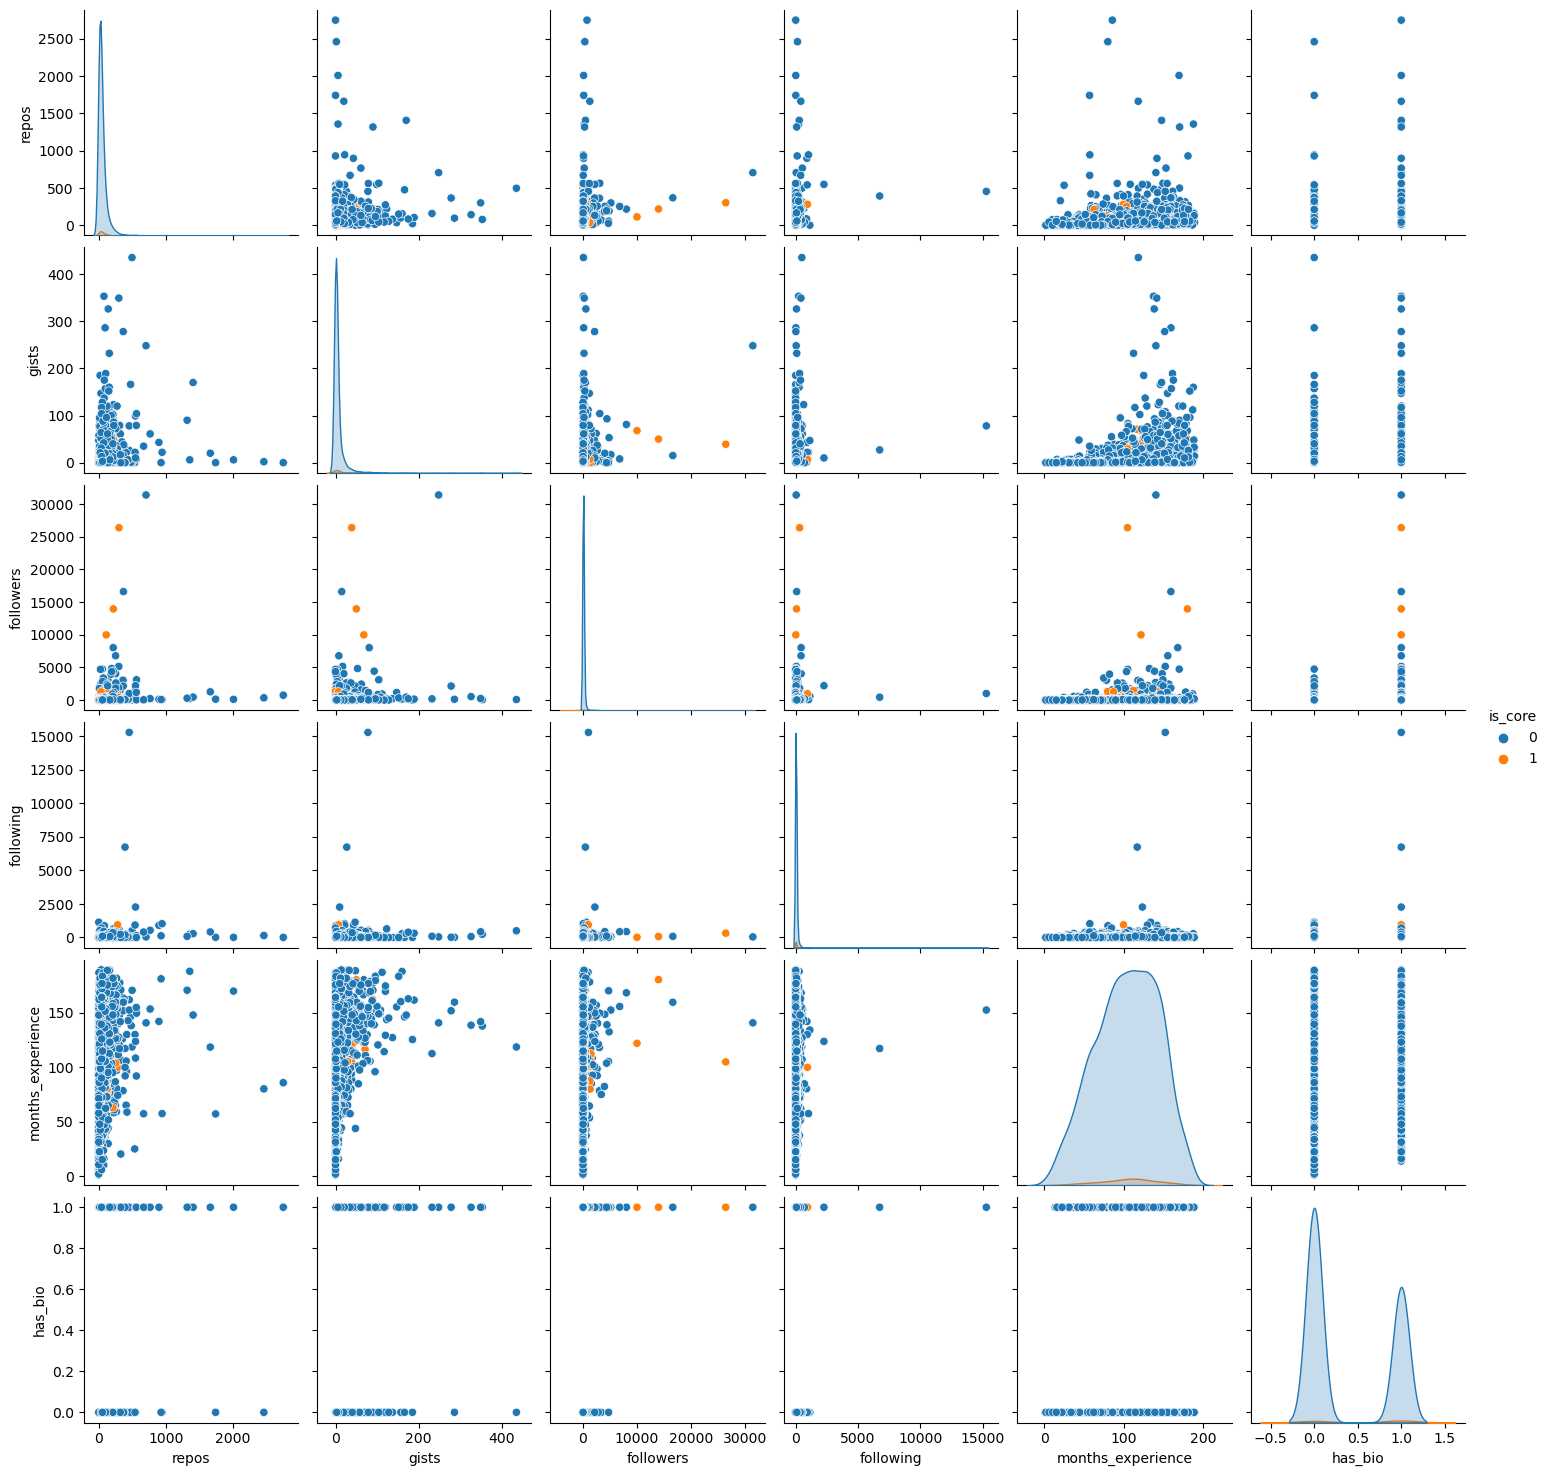

In [63]:
sns.pairplot(c3, hue = 'is_core')

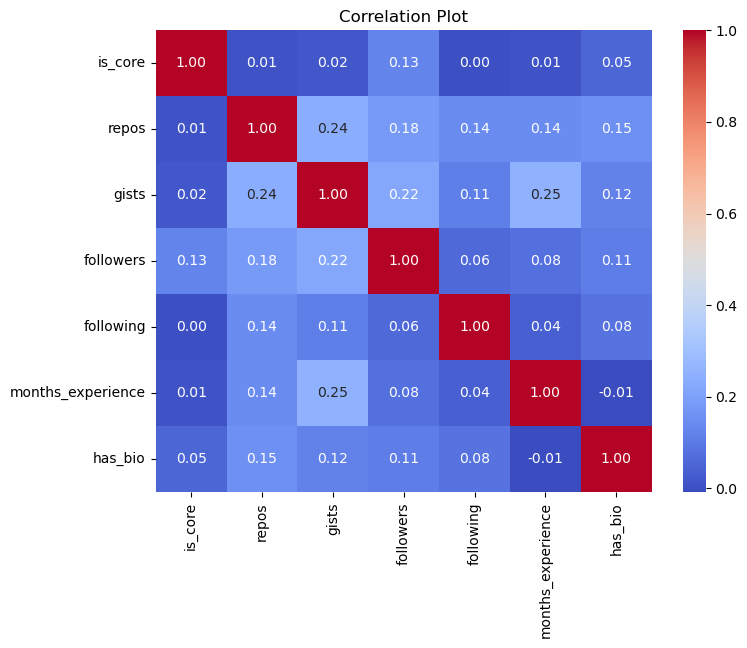

In [64]:
# Calculating the correlation matrix
correlation_matrix = c3.corr()

# Creating a correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Adding a title
plt.title('Correlation Plot')

# Displaying the plot
plt.show() 

In [65]:
x = c3.drop(columns='is_core').to_numpy()
y = c3['is_core'].to_numpy()
x_resampled_adasyn, y_resampled_adasyn = adasyn.fit_resample(x,y)
c3_adasyn = pd.DataFrame(data=x_resampled_adasyn, columns=['repos', 'gists', 'followers', 'following', 'months_experience', 'has_bio'])  # Replace column names as needed
c3_adasyn['is_core'] = y_resampled_adasyn  # Assuming 'target' is the name of your target column
c3_adasyn['has_bio'] = c3_adasyn['has_bio'].apply(lambda x: 1 if x >= 0.5 else 0)
c3_adasyn

repos  gists    followers  following  months_experience  has_bio  \
0     151.000000    6.0   235.000000  36.000000         125.650000        1   
1      55.000000    0.0    21.000000   3.000000         130.540000        0   
2     136.000000    3.0     9.000000  19.000000          70.950000        1   
3     548.000000   19.0  1707.000000   5.000000         108.310000        0   
4     160.000000    8.0   331.000000  16.000000         122.330000        0   
...          ...    ...          ...        ...                ...      ...   
7151    4.000000    0.0     4.614675   0.461775          34.662685        0   
7152    4.000000    0.0     4.946000   0.351333          35.204953        0   
7153    7.336256    0.0    23.851599   0.165936          45.840440        1   
7154    7.360322    0.0     4.344129   0.327936          52.773347        0   
7155    9.679304    0.0     2.402179   0.701089          32.522170        1   

      is_core  
0           0  
1           0  
2           0  
3           0  
4           0  
...       ...  
7151        1  
7152        1  
7153        1  
7154        1  
7155        1  

[7156 rows x 7 columns]

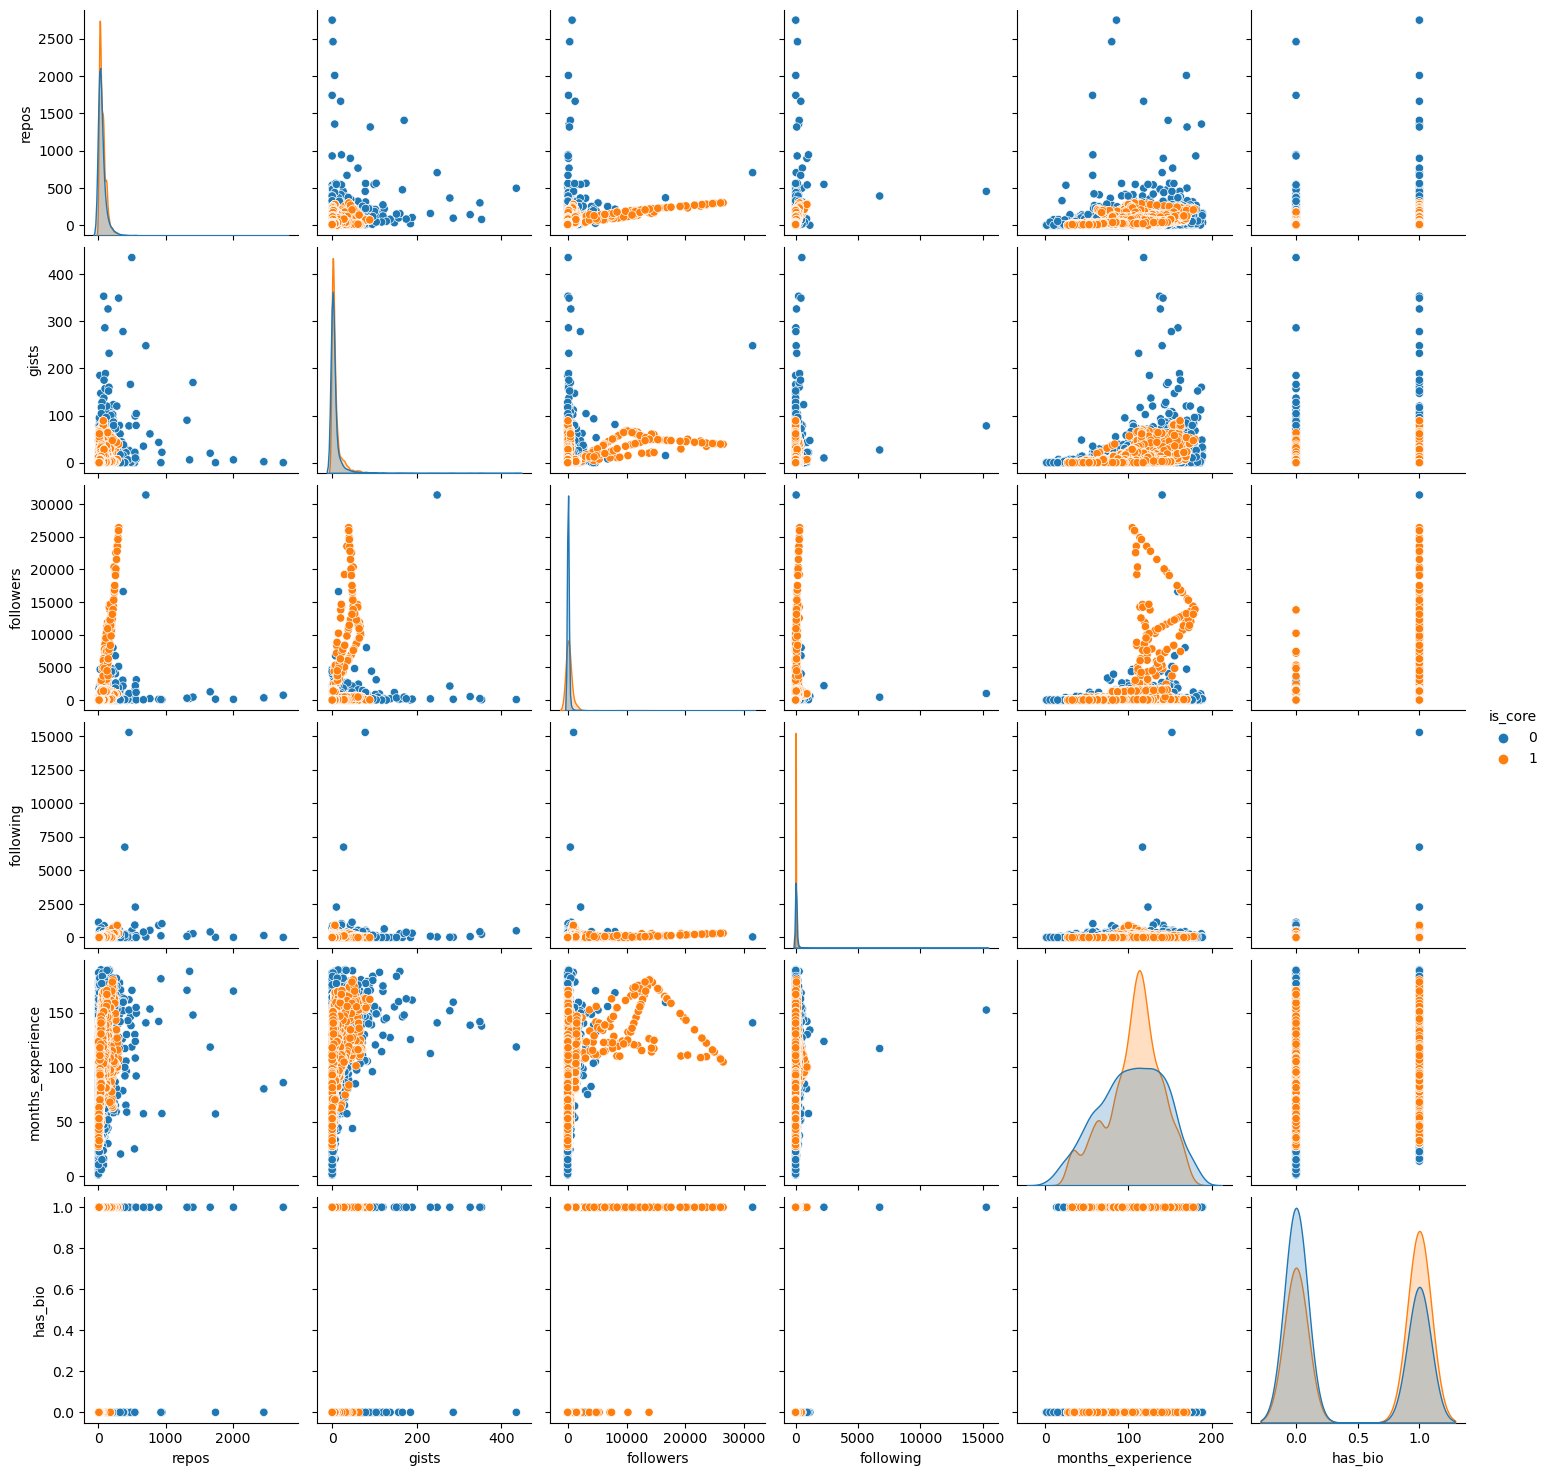

In [66]:
sns.pairplot(c3_adasyn, hue = 'is_core')

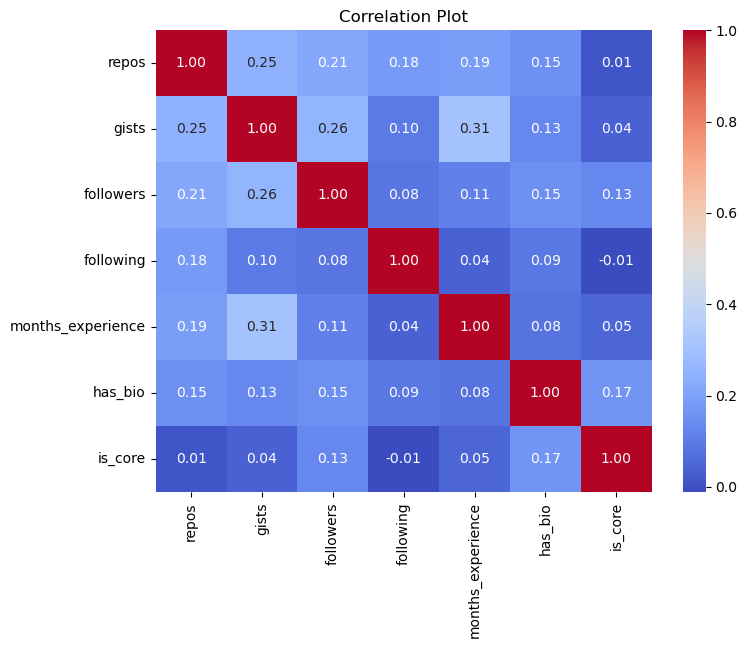

In [67]:
# Calculating the correlation matrix
correlation_matrix = c3_adasyn.corr()

# Creating a correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Adding a title
plt.title('Correlation Plot')

# Displaying the plot
plt.show() 

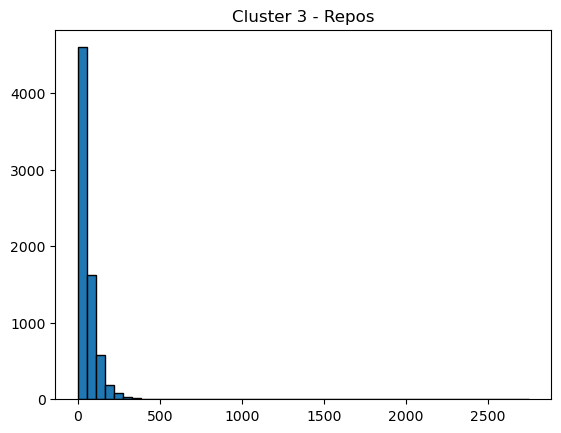

In [68]:
plt.hist(c3_adasyn.repos, bins=50, edgecolor='black')
plt.title('Cluster 3 - Repos')
plt.show()

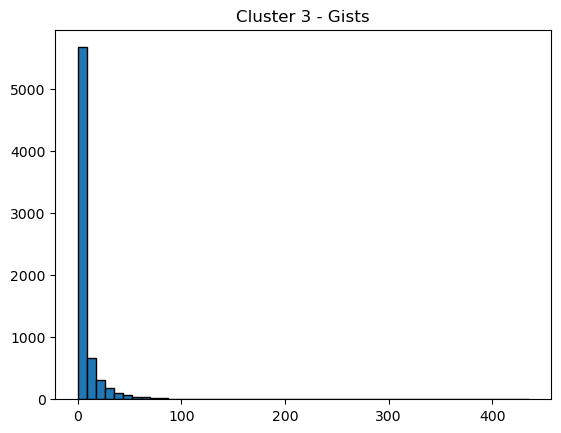

In [69]:
plt.hist(c3_adasyn.gists, bins=50, edgecolor='black')
plt.title('Cluster 3 - Gists')
plt.show()

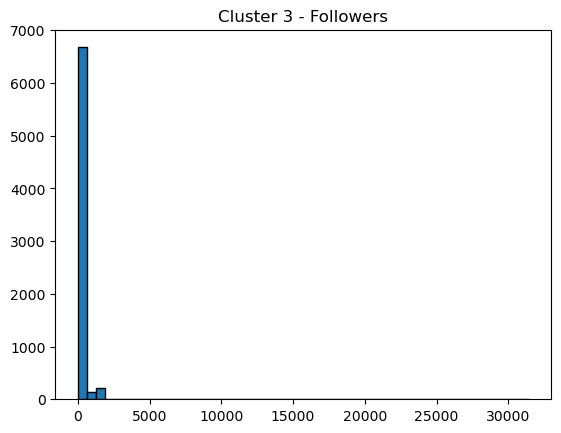

In [70]:
plt.hist(c3_adasyn.followers, bins=50, edgecolor='black')
plt.title('Cluster 3 - Followers')
plt.show()

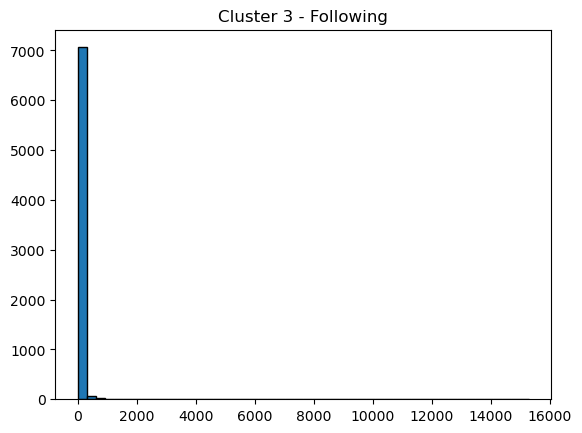

In [71]:
plt.hist(c3_adasyn.following, bins=50, edgecolor='black')
plt.title('Cluster 3 - Following')
plt.show()

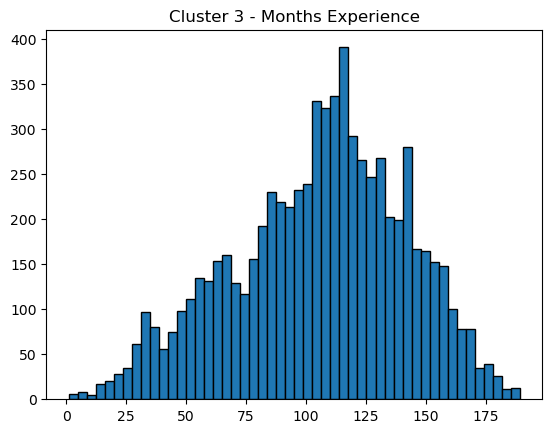

In [72]:
plt.hist(c3_adasyn.months_experience, bins=50, edgecolor='black')
plt.title('Cluster 3 - Months Experience')
plt.show()

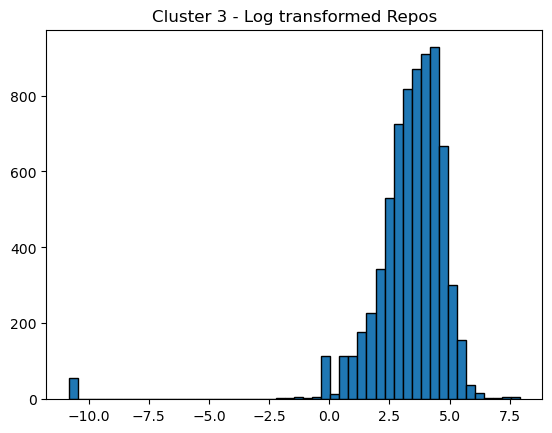

In [73]:
plt.hist(np.log(c3_adasyn.repos+2e-5), bins=50, edgecolor='black')
plt.title('Cluster 3 - Log transformed Repos')
plt.show()

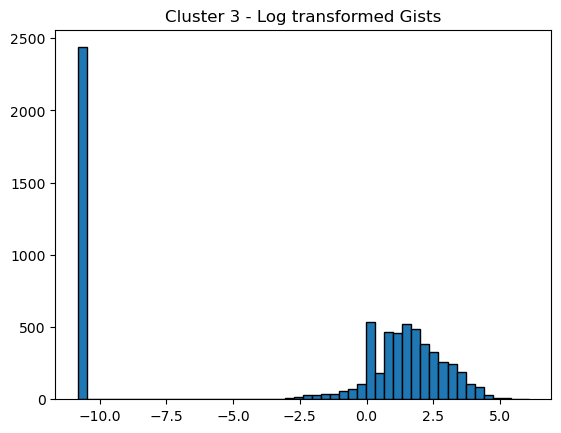

In [74]:
plt.hist(np.log(c3_adasyn.gists+2e-5), bins=50, edgecolor='black')
plt.title('Cluster 3 - Log transformed Gists')
plt.show()

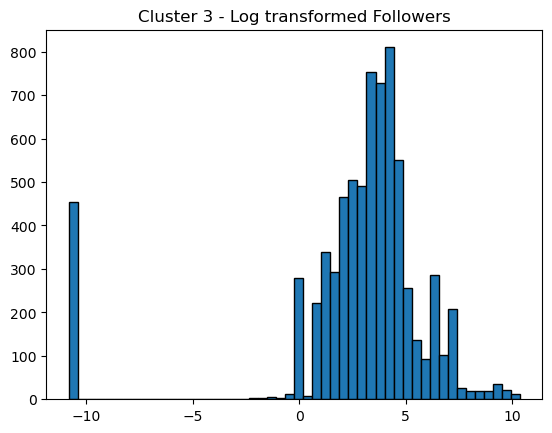

In [75]:
plt.hist(np.log(c3_adasyn.followers+2e-5), bins=50, edgecolor='black')
plt.title('Cluster 3 - Log transformed Followers')
plt.show()

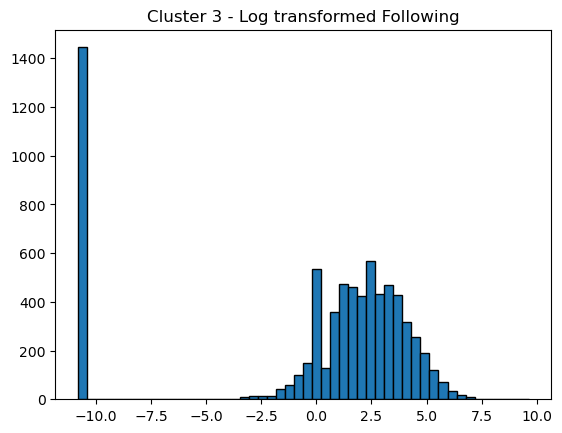

In [76]:
plt.hist(np.log(c3_adasyn.following+2e-5), bins=50, edgecolor='black')
plt.title('Cluster 3 - Log transformed Following')
plt.show()

In [77]:
c3_adasyn_log = c3_adasyn.copy()
c3_adasyn_log['repos'] = np.log(c3_adasyn_log.repos+2e-5)
c3_adasyn_log['gists'] = np.log(c3_adasyn_log.gists+2e-5)
c3_adasyn_log['followers'] = np.log(c3_adasyn_log.followers+2e-5)
c3_adasyn_log['following'] = np.log(c3_adasyn_log.following+2e-5)
c3_adasyn_log

repos      gists  followers  following  months_experience  has_bio  \
0     5.017280   1.791763   5.459586   3.583519         125.650000        1   
1     4.007334 -10.819778   3.044523   1.098619         130.540000        0   
2     4.912655   1.098619   2.197227   2.944440          70.950000        1   
3     6.306275   2.944440   7.442493   1.609442         108.310000        0   
4     5.075174   2.079444   5.802118   2.772590         122.330000        0   
...        ...        ...        ...        ...                ...      ...   
7151  1.386299 -10.819778   1.529246  -0.772634          34.662685        0   
7152  1.386299 -10.819778   1.598583  -1.045963          35.204953        0   
7153  1.992831 -10.819778   3.171852  -1.796032          45.840440        1   
7154  1.996106 -10.819778   1.468830  -1.114877          52.773347        0   
7155  2.269992 -10.819778   0.876384  -0.355092          32.522170        1   

      is_core  
0           0  
1           0  
2           0  
3           0  
4           0  
...       ...  
7151        1  
7152        1  
7153        1  
7154        1  
7155        1  

[7156 rows x 7 columns]

In [78]:
x = c3_adasyn_log.drop(columns = ['has_bio', 'is_core'])
x

repos      gists  followers  following  months_experience
0     5.017280   1.791763   5.459586   3.583519         125.650000
1     4.007334 -10.819778   3.044523   1.098619         130.540000
2     4.912655   1.098619   2.197227   2.944440          70.950000
3     6.306275   2.944440   7.442493   1.609442         108.310000
4     5.075174   2.079444   5.802118   2.772590         122.330000
...        ...        ...        ...        ...                ...
7151  1.386299 -10.819778   1.529246  -0.772634          34.662685
7152  1.386299 -10.819778   1.598583  -1.045963          35.204953
7153  1.992831 -10.819778   3.171852  -1.796032          45.840440
7154  1.996106 -10.819778   1.468830  -1.114877          52.773347
7155  2.269992 -10.819778   0.876384  -0.355092          32.522170

[7156 rows x 5 columns]

In [79]:
x2 = c3_adasyn_log[['has_bio', 'is_core']]
x2

has_bio  is_core
0           1        0
1           0        0
2           1        0
3           0        0
4           0        0
...       ...      ...
7151        0        1
7152        0        1
7153        1        1
7154        0        1
7155        1        1

[7156 rows x 2 columns]

In [80]:
scaler = StandardScaler()
x = scaler.fit_transform(x)
c3_adasyn_log_scaled = pd.DataFrame(x, columns=['repos', 'gists', 'followers', 'following', 'months_experience'])
c3_adasyn_log_scaled = pd.concat([c3_adasyn_log_scaled, x2], axis = 1)
c3_adasyn_log_scaled

repos     gists  followers  following  months_experience  has_bio  \
0     0.970120  0.752661   0.710384   0.728667           0.557890        1   
1     0.395020 -1.365424   0.098895   0.274719           0.693844        0   
2     0.910543  0.636249  -0.115639   0.611918          -0.962909        1   
3     1.704122  0.946251   1.212453   0.368037           0.075794        0   
4     1.003087  0.800976   0.797113   0.580524           0.465585        0   
...        ...       ...        ...        ...                ...      ...   
7151 -1.097494 -1.365424  -0.284771  -0.067127          -1.971789        0   
7152 -1.097494 -1.365424  -0.267215  -0.117059          -1.956713        0   
7153 -0.752112 -1.365424   0.131134  -0.254084          -1.661019        1   
7154 -0.750247 -1.365424  -0.300068  -0.129648          -1.468267        0   
7155 -0.594287 -1.365424  -0.450074   0.009151          -2.031301        1   

      is_core  
0           0  
1           0  
2           0  
3           0  
4           0  
...       ...  
7151        1  
7152        1  
7153        1  
7154        1  
7155        1  

[7156 rows x 7 columns]

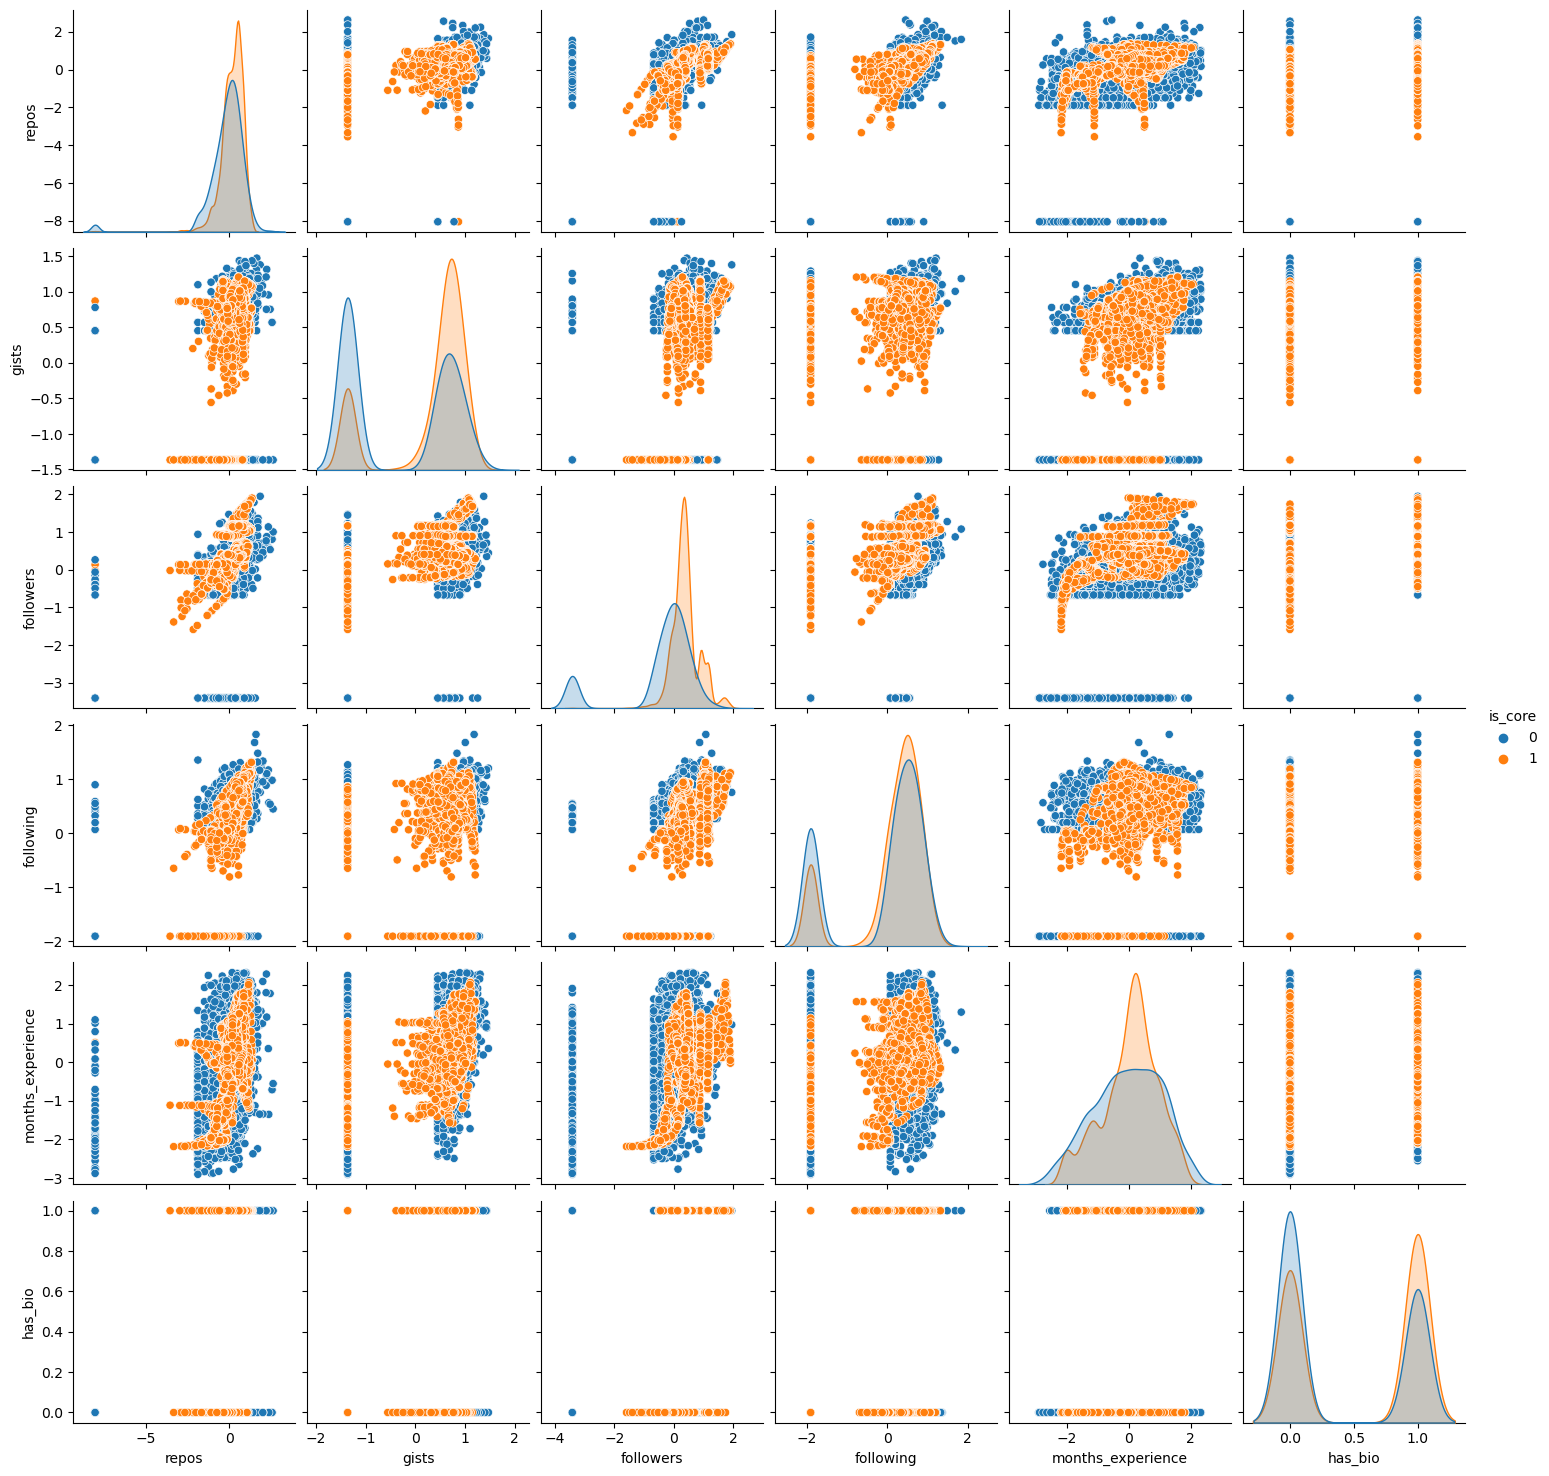

In [81]:
sns.pairplot(c3_adasyn_log_scaled, hue = 'is_core')

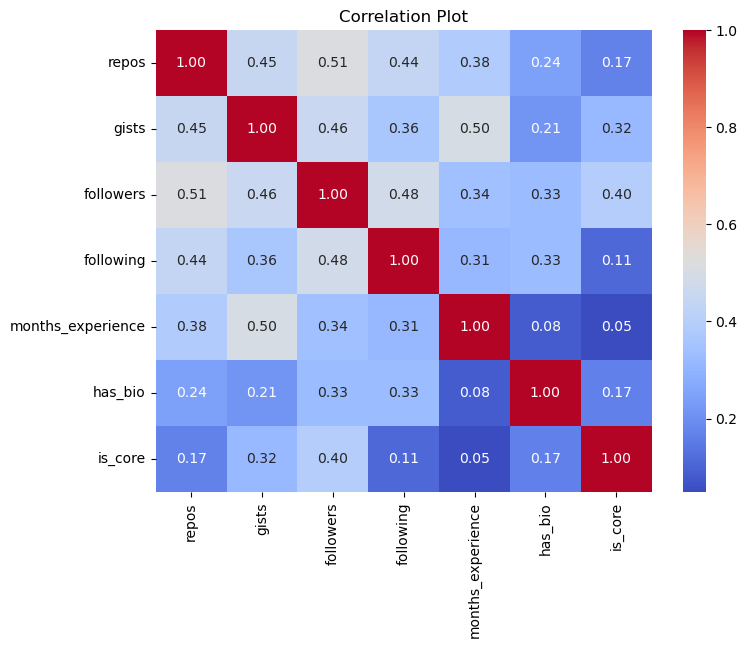

In [82]:
# Calculating the correlation matrix
correlation_matrix = c3_adasyn_log_scaled.corr()

# Creating a correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Adding a title
plt.title('Correlation Plot')

# Displaying the plot
plt.show() 

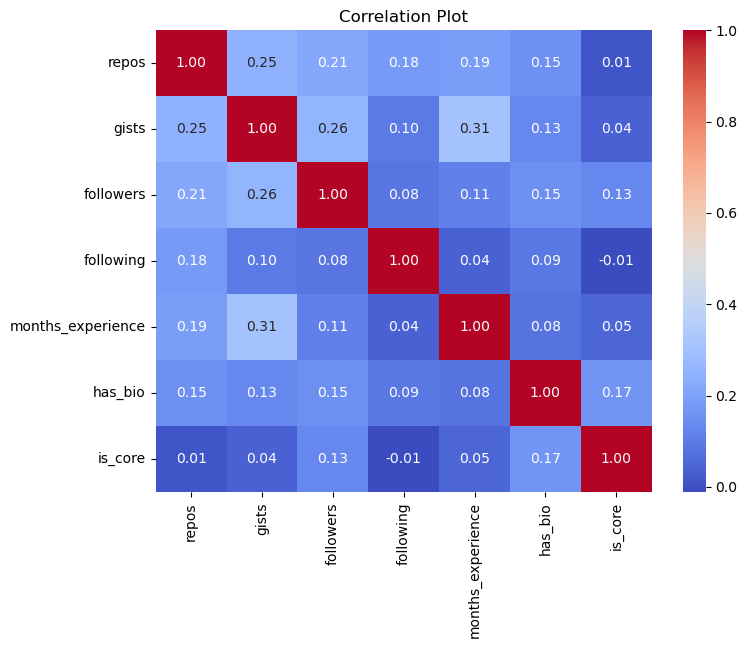

In [83]:
# Creating a correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(c3_adasyn.corr(), annot=True, cmap='coolwarm', fmt=".2f")

# Adding a title
plt.title('Correlation Plot')

# Displaying the plot
plt.show() 

In [84]:
X = c3_adasyn_log_scaled.drop('is_core', axis=1)
y = c3_adasyn_log_scaled['is_core']

# Calculating mutual information for each feature
mi_scores = mutual_info_classif(X, y)  # For classification tasks


# Displaying the mutual information scores
for feature, score in zip(X.columns, mi_scores):
    print(f"{feature}: {score:.4f}")

repos: 0.4818
gists: 0.3764
followers: 0.4923
following: 0.3879
months_experience: 0.0571
has_bio: 0.0141


In [85]:
X = c3_adasyn.drop('is_core', axis=1)
y = c3_adasyn['is_core']

# Calculating mutual information for each feature
mi_scores = mutual_info_classif(X, y)  # For classification tasks


# Displaying the mutual information scores
for feature, score in zip(X.columns, mi_scores):
    print(f"{feature}: {score:.4f}")

repos: 0.4824
gists: 0.3908
followers: 0.4919
following: 0.3822
months_experience: 0.0571
has_bio: 0.0105


# Cluster 1

In [86]:
c1_cols = c2_cols + c3_cols

In [87]:
c1_cols

['microsoft/azuredatastudio',
 'xamarin/xamarin-macios',
 'pingcap/docs',
 'umijs/umi',
 'netbox-community/netbox',
 'grafana/loki',
 'awsdocs/aws-doc-sdk-examples',
 'vueuse/vueuse',
 'yuzu-emu/yuzu',
 'TanStack/query',
 'lvgl/lvgl',
 'arendst/Tasmota',
 'Aircoookie/WLED']

In [88]:
filtered_c1 = df1[~df1['name_with_owner'].isin(c1_cols)]
selected_columns = ['is_core', 'repos', 'gists', 'followers', 'following', 'months_experience', 'has_bio']
# Subset the DataFrame based on the selected columns
c1 = filtered_c1[selected_columns]

In [89]:
c1

is_core  repos  gists  followers  following  months_experience  has_bio
0           0     90      5        450         67             115.45        1
1           0     88     14       2685          7             151.54        1
2           0    102     72         42          0             166.86        0
3           0     37     15         11         10             152.46        1
4           0     50      1         58         17             137.50        1
...       ...    ...    ...        ...        ...                ...      ...
8439        0     19      0          5          1             126.98        0
8440        0      0      0          0          0              28.65        0
8441        0      1      1         13          3             124.58        1
8442        0      0      0          0          0               9.54        0
8443        0     26      0          6         16             113.27        1

[4204 rows x 7 columns]

In [90]:
print(c1['is_core'].value_counts())

0    3970
1     234
Name: is_core, dtype: int64


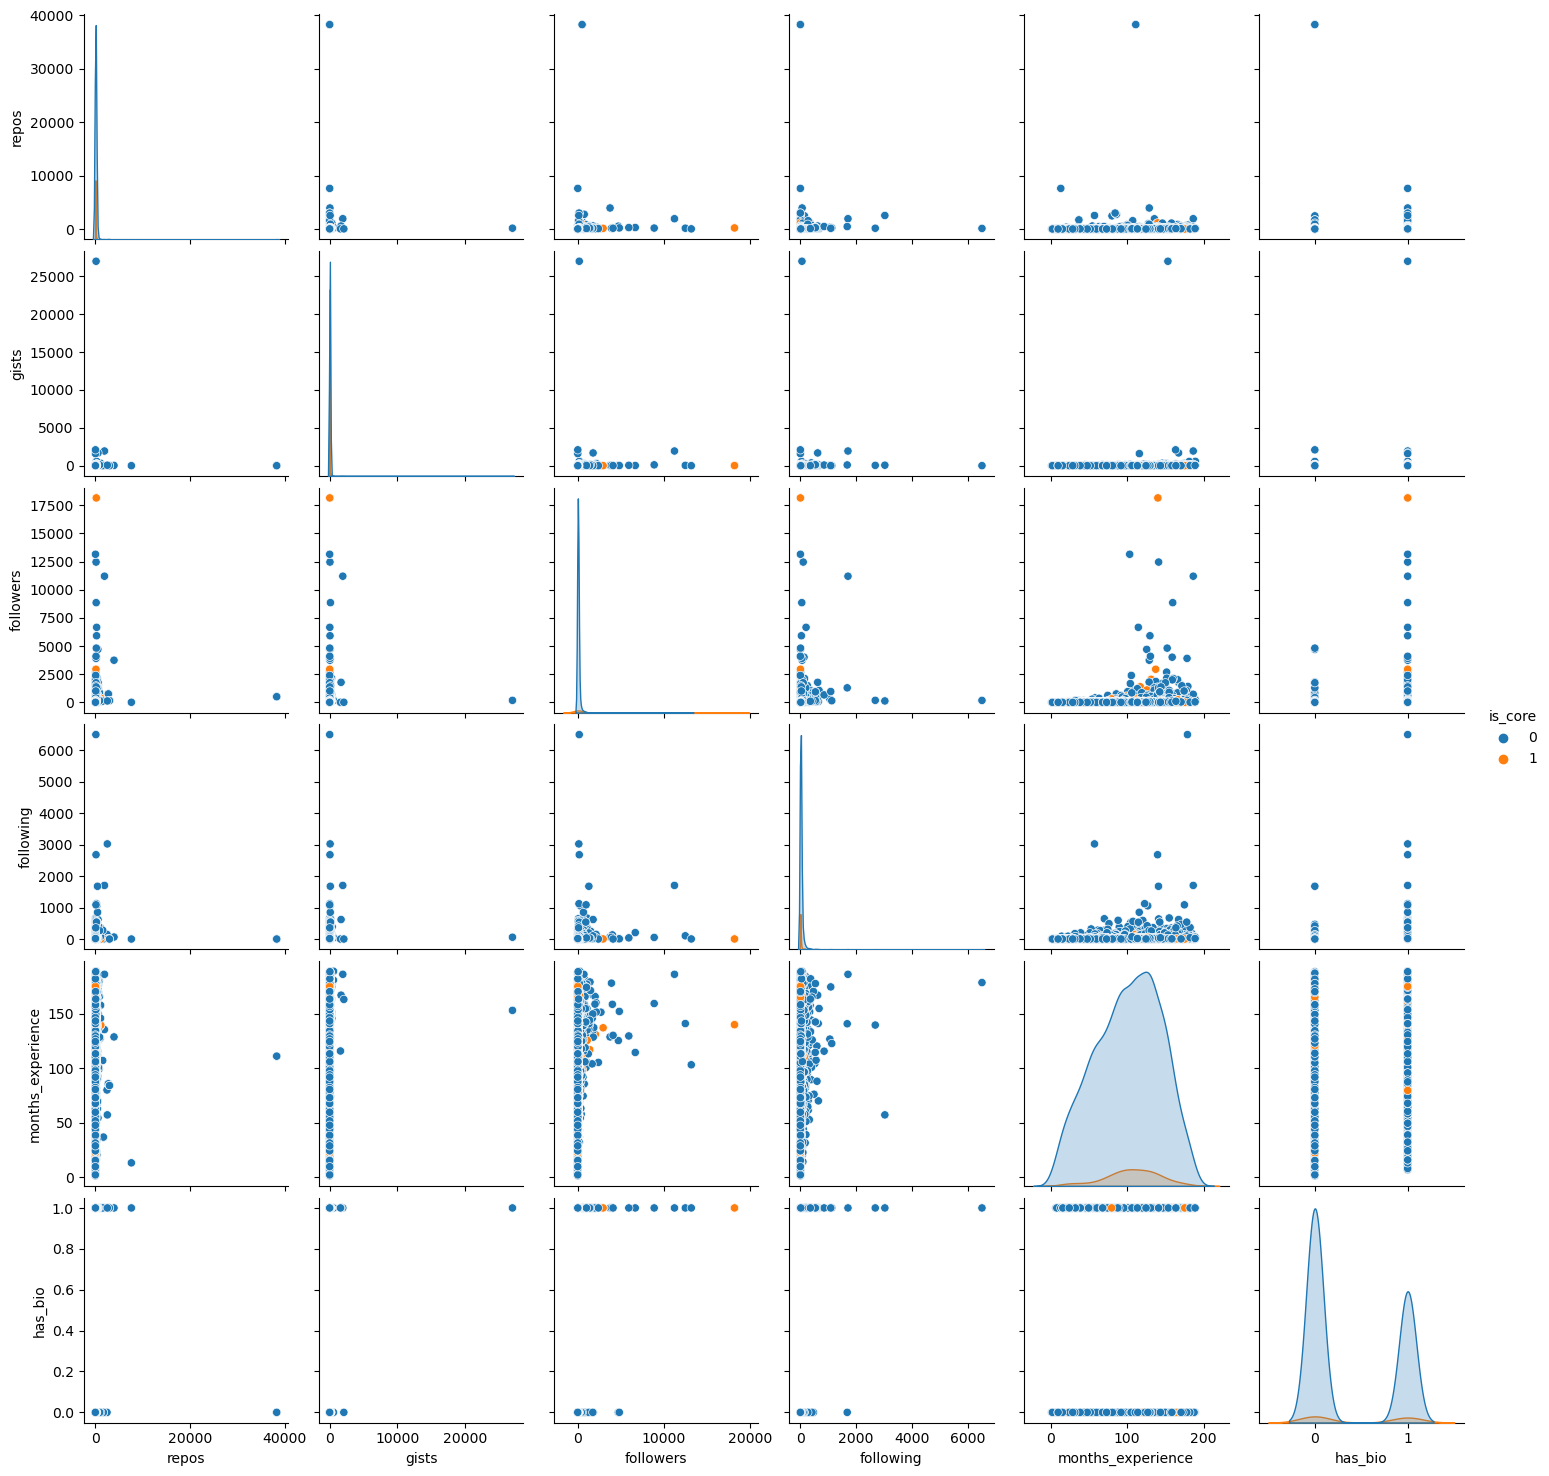

In [91]:
sns.pairplot(c1, hue = 'is_core')

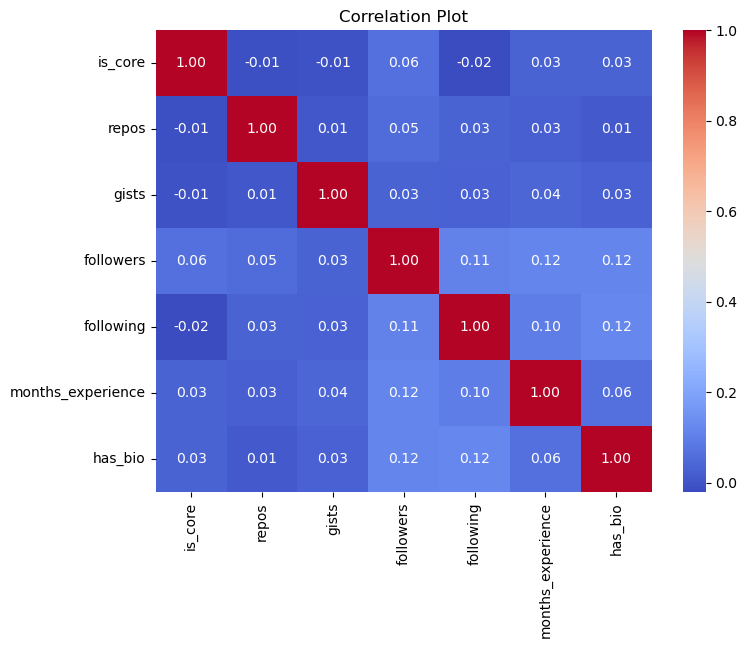

In [92]:
# Calculating the correlation matrix
correlation_matrix = c1.corr()

# Creating a correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Adding a title
plt.title('Correlation Plot')

# Displaying the plot
plt.show() 

In [93]:
x = c1.drop(columns='is_core').to_numpy()
y = c1['is_core'].to_numpy()
x_resampled_adasyn, y_resampled_adasyn = adasyn.fit_resample(x,y)
c1_adasyn = pd.DataFrame(data=x_resampled_adasyn, columns=['repos', 'gists', 'followers', 'following', 'months_experience', 'has_bio'])  # Replace column names as needed
c1_adasyn['is_core'] = y_resampled_adasyn  # Assuming 'target' is the name of your target column
c1_adasyn['has_bio'] = c1_adasyn['has_bio'].apply(lambda x: 1 if x >= 0.5 else 0)
c1_adasyn

repos      gists    followers  following  months_experience  \
0      90.000000   5.000000   450.000000  67.000000         115.450000   
1      88.000000  14.000000  2685.000000   7.000000         151.540000   
2     102.000000  72.000000    42.000000   0.000000         166.860000   
3      37.000000  15.000000    11.000000  10.000000         152.460000   
4      50.000000   1.000000    58.000000  17.000000         137.500000   
...          ...        ...          ...        ...                ...   
7907   58.238535   4.178901     6.357802   0.000000         125.712026   
7908   63.774826   6.492907    12.000000   1.014186         130.215944   
7909   57.652642   5.616750    12.592822   0.000000         135.491539   
7910   51.320394   4.864079    13.281553   0.427184         131.993206   
7911   56.413801   5.882760    12.670344   0.223448         134.352473   

      has_bio  is_core  
0           1        0  
1           1        0  
2           0        0  
3           1        0  
4           1        0  
...       ...      ...  
7907        0        1  
7908        0        1  
7909        0        1  
7910        0        1  
7911        0        1  

[7912 rows x 7 columns]

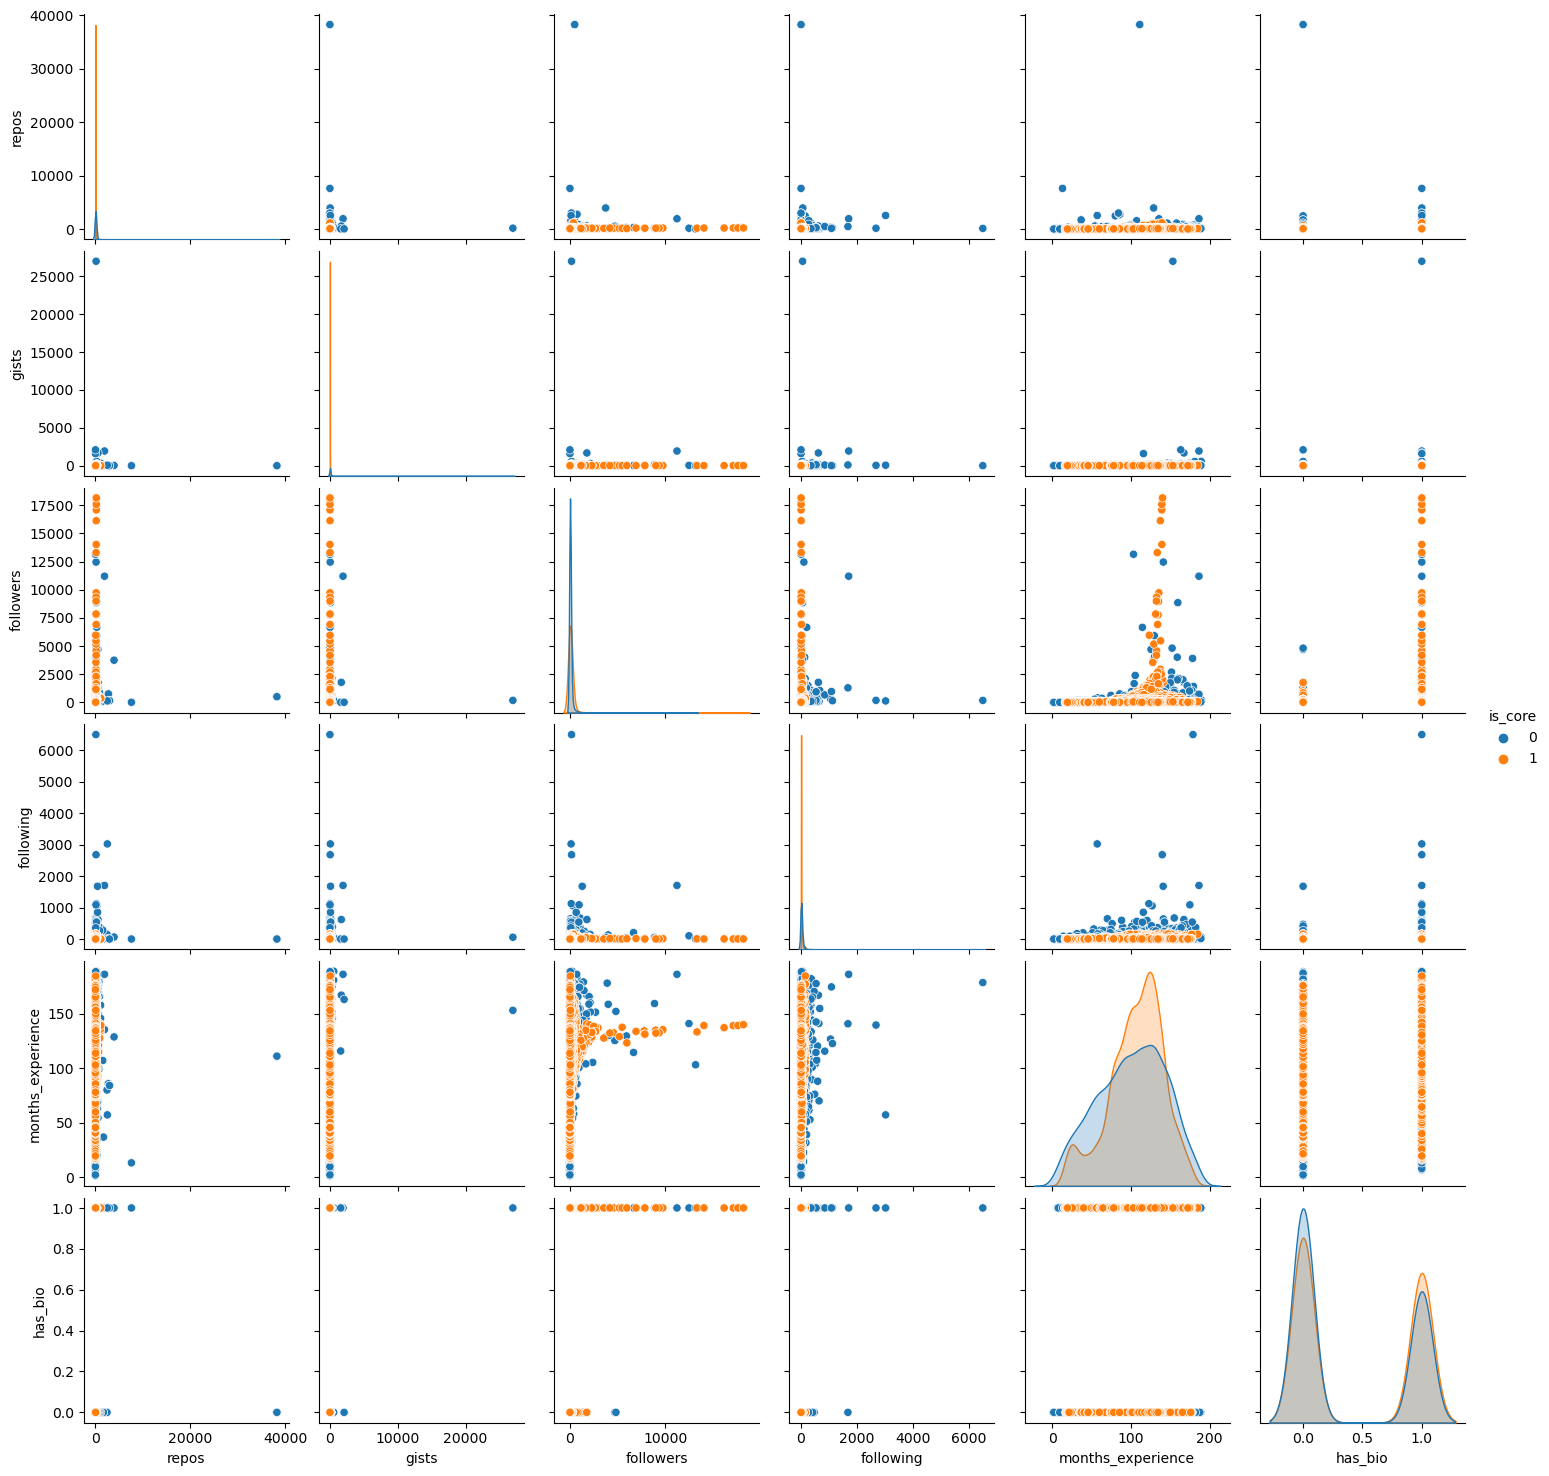

In [94]:
sns.pairplot(c1_adasyn, hue = 'is_core')

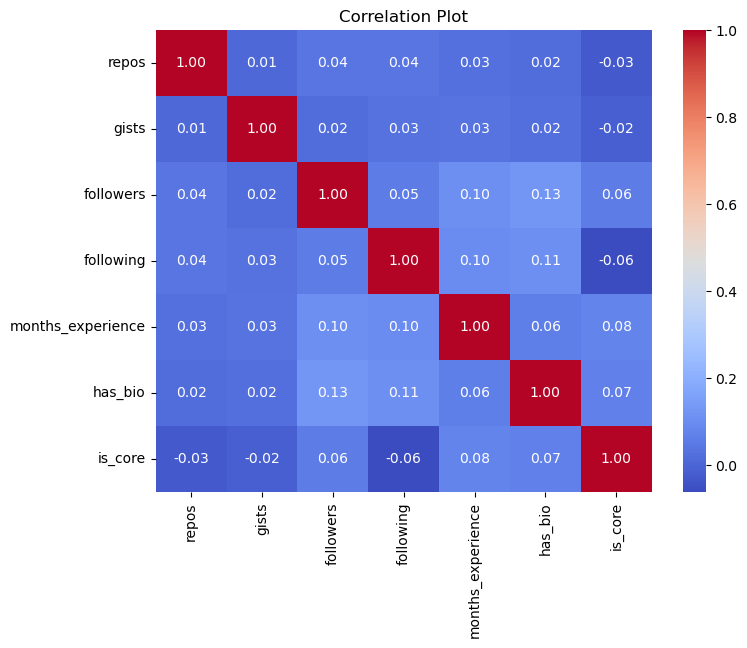

In [95]:
# Calculating the correlation matrix
correlation_matrix = c1_adasyn.corr()

# Creating a correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Adding a title
plt.title('Correlation Plot')

# Displaying the plot
plt.show() 

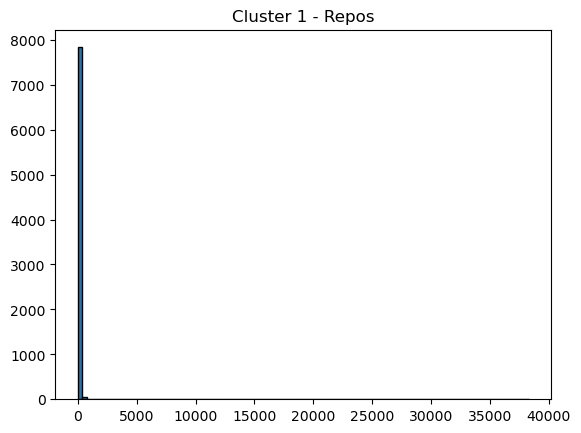

In [96]:
plt.hist(c1_adasyn.repos, bins=100, edgecolor='black')
plt.title('Cluster 1 - Repos')
plt.show()

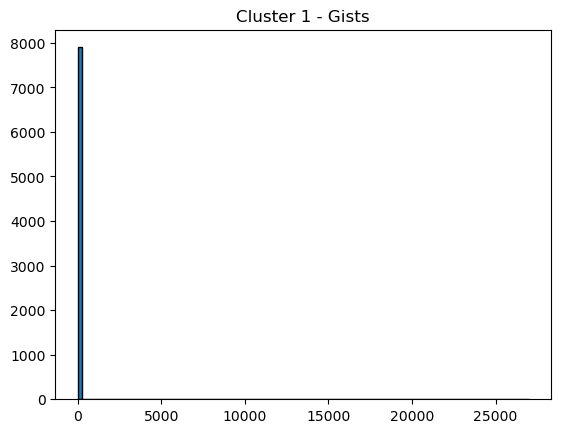

In [97]:
plt.hist(c1_adasyn.gists, bins=100, edgecolor='black')
plt.title('Cluster 1 - Gists')
plt.show()

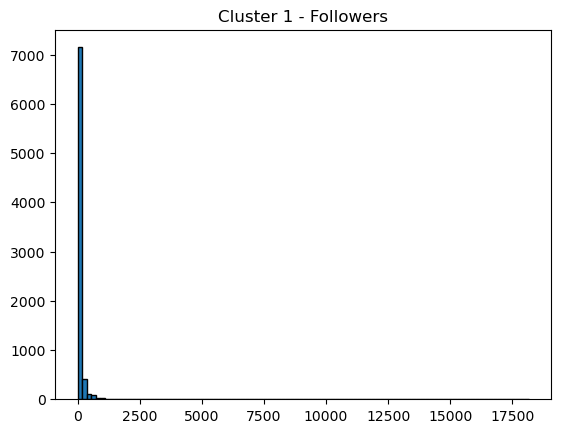

In [98]:
plt.hist(c1_adasyn.followers, bins=100, edgecolor='black')
plt.title('Cluster 1 - Followers')
plt.show()

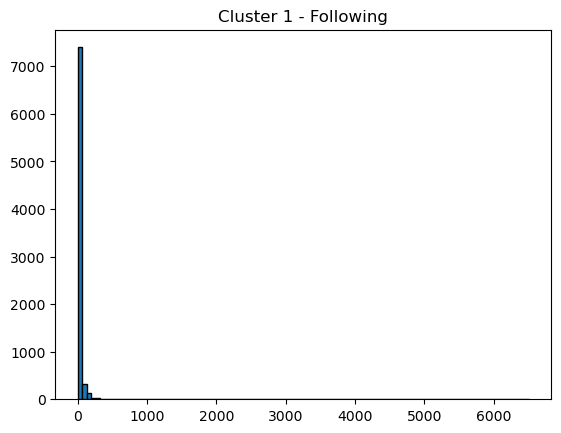

In [99]:
plt.hist(c1_adasyn.following, bins=100, edgecolor='black')
plt.title('Cluster 1 - Following')
plt.show()

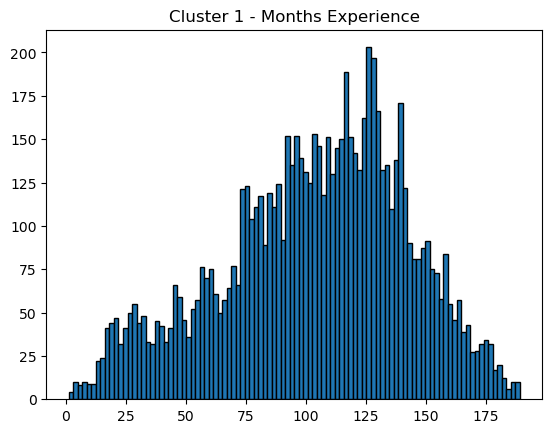

In [100]:
plt.hist(c1_adasyn.months_experience, bins=100, edgecolor='black')
plt.title('Cluster 1 - Months Experience')
plt.show()

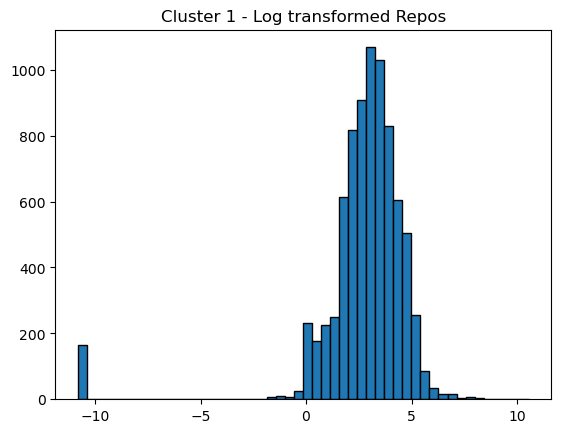

In [101]:
plt.hist(np.log(c1_adasyn.repos+2e-5), bins=50, edgecolor='black')
plt.title('Cluster 1 - Log transformed Repos')
plt.show()

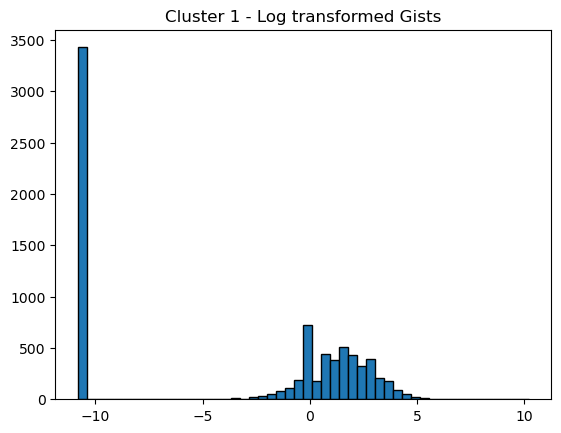

In [102]:
plt.hist(np.log(c1_adasyn.gists+2e-5), bins=50, edgecolor='black')
plt.title('Cluster 1 - Log transformed Gists')
plt.show()

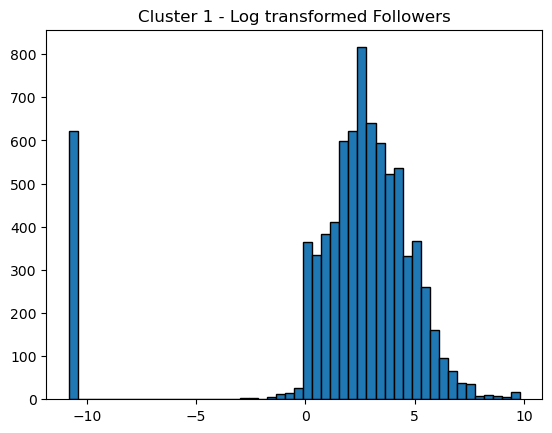

In [103]:
plt.hist(np.log(c1_adasyn.followers+2e-5), bins=50, edgecolor='black')
plt.title('Cluster 1 - Log transformed Followers')
plt.show()

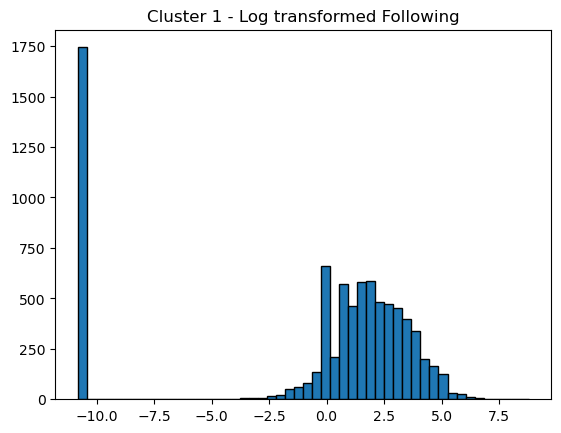

In [104]:
plt.hist(np.log(c1_adasyn.following+2e-5), bins=50, edgecolor='black')
plt.title('Cluster 1 - Log transformed Following')
plt.show()

In [105]:
c1_adasyn_log = c1_adasyn.copy()
c1_adasyn_log['repos'] = np.log(c1_adasyn_log.repos+2e-5)
c1_adasyn_log['gists'] = np.log(c1_adasyn_log.gists+2e-5)
c1_adasyn_log['followers'] = np.log(c1_adasyn_log.followers+2e-5)
c1_adasyn_log['following'] = np.log(c1_adasyn_log.following+2e-5)
c1_adasyn_log

repos     gists  followers  following  months_experience  has_bio  \
0     4.499810  1.609442   6.109248   4.204693         115.450000        1   
1     4.477337  2.639059   7.895436   1.945913         151.540000        1   
2     4.624973  4.276666   3.737670 -10.819778         166.860000        0   
3     3.610918  2.708052   2.397897   2.302587         152.460000        1   
4     3.912023  0.000020   4.060443   2.833215         137.500000        1   
...        ...       ...        ...        ...                ...      ...   
7907  4.064548  1.430053   1.849686 -10.819778         125.712026        0   
7908  4.155359  1.870713   2.484908   0.014106         130.215944        0   
7909  4.054436  1.725757   2.533129 -10.819778         135.491539        0   
7910  3.938089  1.581881   2.586378  -0.850493         131.993206        0   
7911  4.032714  1.772029   2.539266  -1.498487         134.352473        0   

      is_core  
0           0  
1           0  
2           0  
3           0  
4           0  
...       ...  
7907        1  
7908        1  
7909        1  
7910        1  
7911        1  

[7912 rows x 7 columns]

In [106]:
x = c1_adasyn_log.drop(columns = ['has_bio', 'is_core'])
x

repos     gists  followers  following  months_experience
0     4.499810  1.609442   6.109248   4.204693         115.450000
1     4.477337  2.639059   7.895436   1.945913         151.540000
2     4.624973  4.276666   3.737670 -10.819778         166.860000
3     3.610918  2.708052   2.397897   2.302587         152.460000
4     3.912023  0.000020   4.060443   2.833215         137.500000
...        ...       ...        ...        ...                ...
7907  4.064548  1.430053   1.849686 -10.819778         125.712026
7908  4.155359  1.870713   2.484908   0.014106         130.215944
7909  4.054436  1.725757   2.533129 -10.819778         135.491539
7910  3.938089  1.581881   2.586378  -0.850493         131.993206
7911  4.032714  1.772029   2.539266  -1.498487         134.352473

[7912 rows x 5 columns]

In [107]:
x2 = c1_adasyn_log[['has_bio', 'is_core']]
x2

has_bio  is_core
0           1        0
1           1        0
2           0        0
3           1        0
4           1        0
...       ...      ...
7907        0        1
7908        0        1
7909        0        1
7910        0        1
7911        0        1

[7912 rows x 2 columns]

In [108]:
scaler = StandardScaler()
x = scaler.fit_transform(x)
c1_adasyn_log_scaled = pd.DataFrame(x, columns=['repos', 'gists', 'followers', 'following', 'months_experience'])
c1_adasyn_log_scaled = pd.concat([c1_adasyn_log_scaled, x2], axis = 1)
c1_adasyn_log_scaled

repos     gists  followers  following  months_experience  has_bio  \
0     0.735923  0.907970   1.039396   0.933645           0.311035        1   
1     0.726468  1.076126   1.478775   0.520554           1.241576        1   
2     0.788578  1.343578   0.456019  -1.814067           1.636585        0   
3     0.361969  1.087394   0.126452   0.585783           1.265297        1   
4     0.488643  0.645121   0.535417   0.682826           0.879570        1   
...        ...       ...        ...        ...                ...      ...   
7907  0.552809  0.878672  -0.008401  -1.814067           0.575630        0   
7908  0.591013  0.950641   0.147855   0.167260           0.691759        0   
7909  0.548556  0.926966   0.159717  -1.814067           0.827784        0   
7910  0.499609  0.903469   0.172815   0.009140           0.737584        0   
7911  0.539417  0.934524   0.161226  -0.109367           0.798415        0   

      is_core  
0           0  
1           0  
2           0  
3           0  
4           0  
...       ...  
7907        1  
7908        1  
7909        1  
7910        1  
7911        1  

[7912 rows x 7 columns]

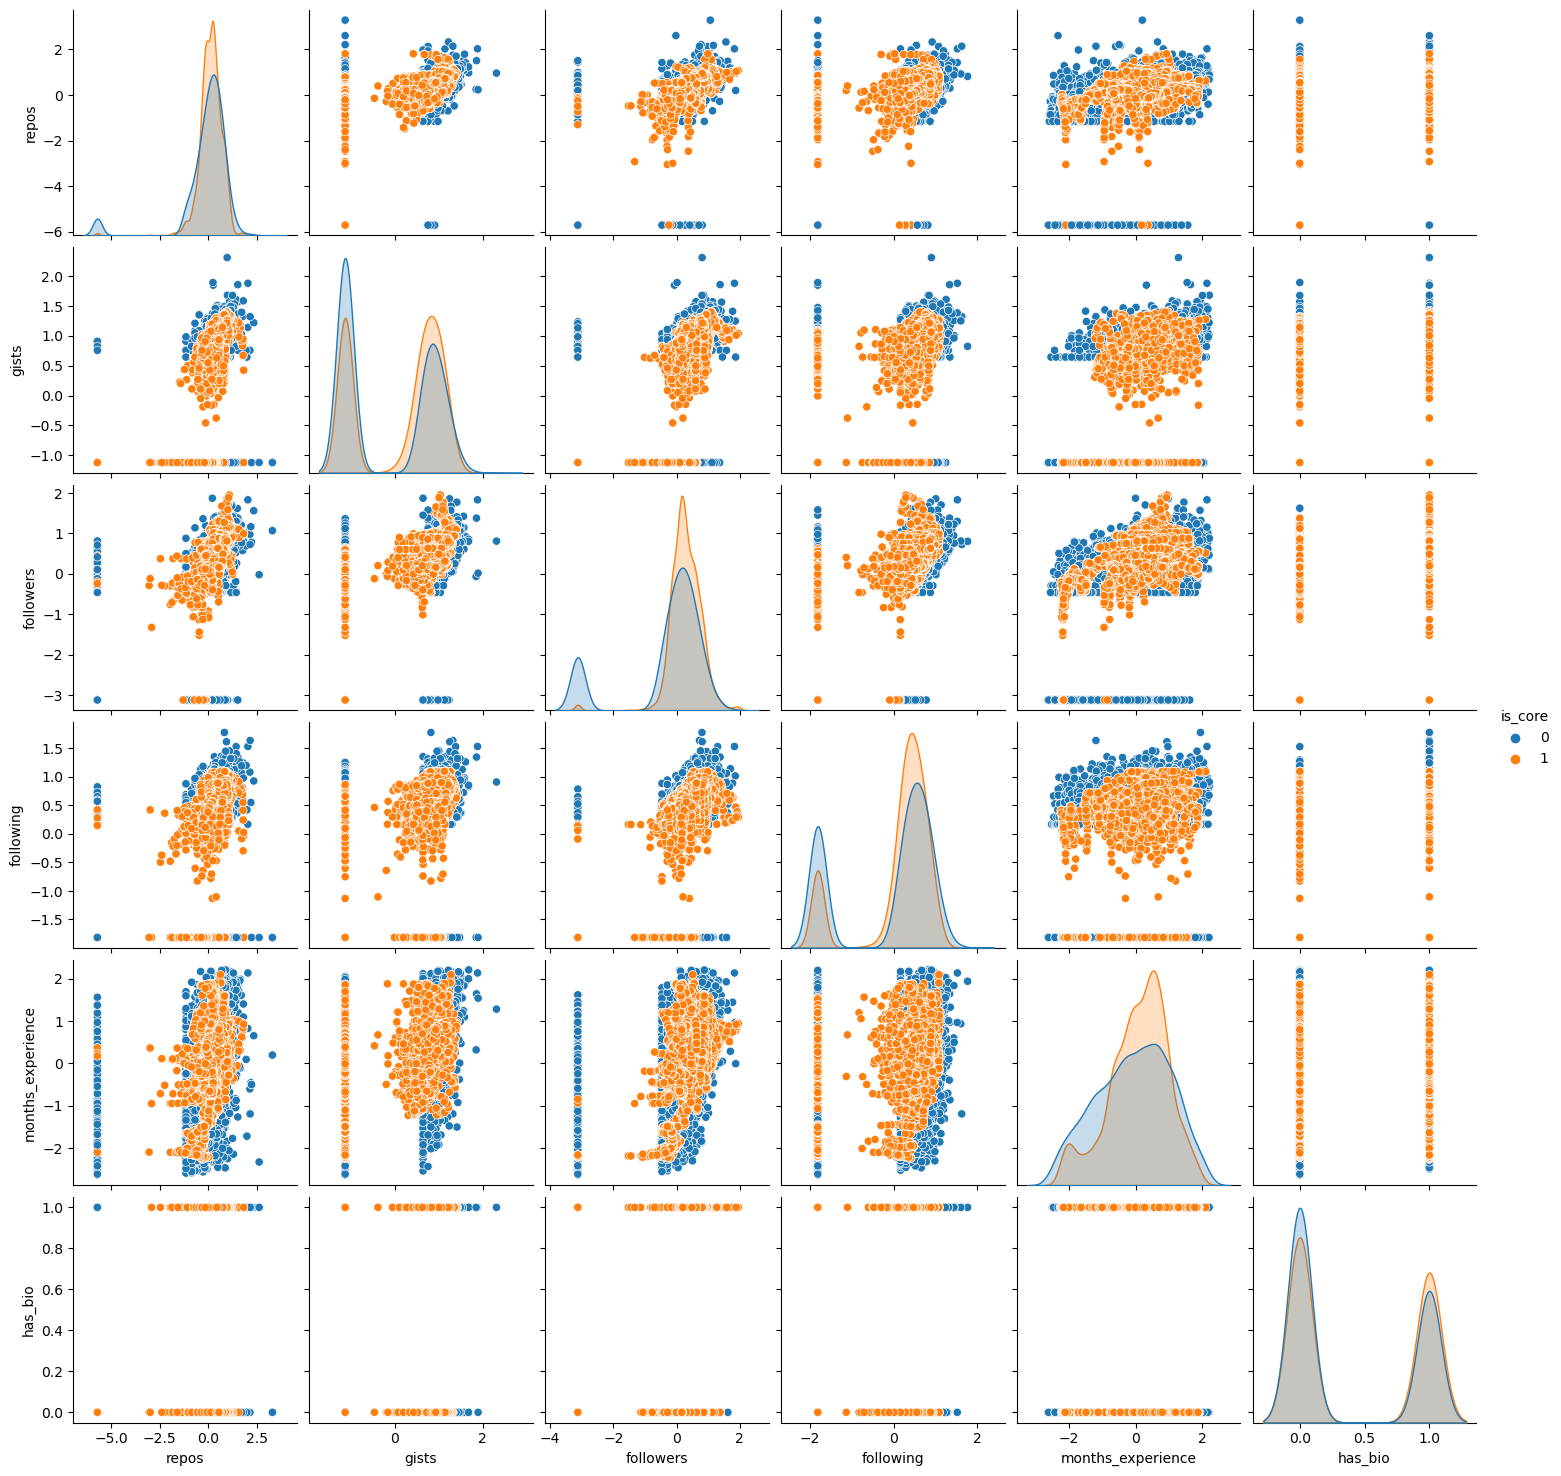

In [109]:
sns.pairplot(c1_adasyn_log_scaled, hue = 'is_core')

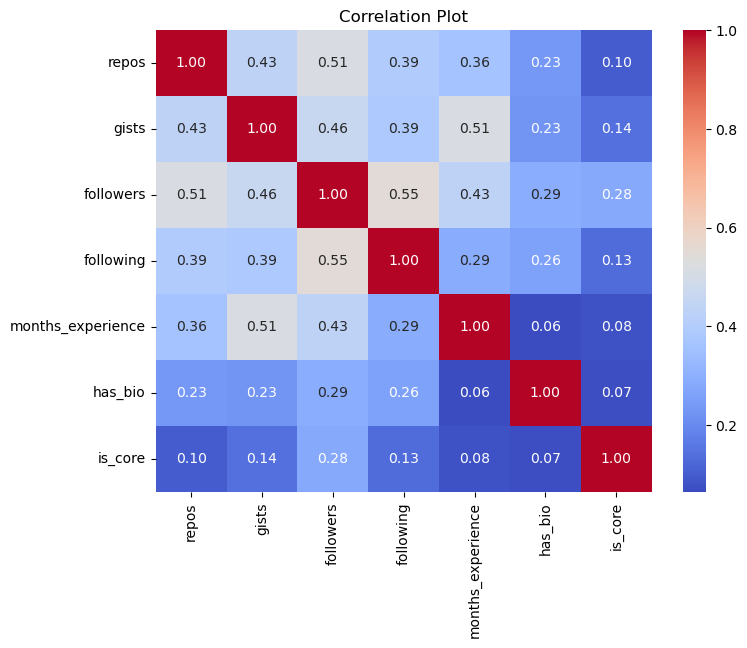

In [110]:
# Calculating the correlation matrix
correlation_matrix = c1_adasyn_log_scaled.corr()

# Creating a correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Adding a title
plt.title('Correlation Plot')

# Displaying the plot
plt.show() 

In [111]:
X = c1_adasyn_log_scaled.drop('is_core', axis=1)
y = c1_adasyn_log_scaled['is_core']

# Calculating mutual information for each feature
mi_scores = mutual_info_classif(X, y)  # For classification tasks


# Displaying the mutual information scores
for feature, score in zip(X.columns, mi_scores):
    print(f"{feature}: {score:.4f}")

repos: 0.4307
gists: 0.2797
followers: 0.4007
following: 0.3721
months_experience: 0.0609
has_bio: 0.0122


In [112]:
X = c1_adasyn.drop('is_core', axis=1)
y = c1_adasyn['is_core']

# Calculating mutual information for each feature
mi_scores = mutual_info_classif(X, y)  # For classification tasks


# Displaying the mutual information scores
for feature, score in zip(X.columns, mi_scores):
    print(f"{feature}: {score:.4f}")

repos: 0.4304
gists: 0.2873
followers: 0.4047
following: 0.3640
months_experience: 0.0610
has_bio: 0.0000


## Distribution tests between clusters

In [113]:
ks_adasyn_c12 = []
p_adasyn_c12 = []
ks_adasyn_c13 = []
p_adasyn_c13 = []
ks_adasyn_c23 = []
p_adasyn_c23 = []
for i in range(5):
    y1 = c1_adasyn.iloc[:,i]
    y2 = c2_adasyn.iloc[:,i]
    y3 = c3_adasyn.iloc[:,i]
    
    ks_stat1, ks_pvalue1 = ks_2samp(y1, y2)
    ks_stat2, ks_pvalue2 = ks_2samp(y1, y3)
    ks_stat3, ks_pvalue3 = ks_2samp(y2, y3)
    
    ks_adasyn_c12.append(ks_stat1)
    ks_adasyn_c13.append(ks_stat2)
    ks_adasyn_c23.append(ks_stat3)
    
    p_adasyn_c12.append(ks_pvalue1)
    p_adasyn_c13.append(ks_pvalue2)
    p_adasyn_c23.append(ks_pvalue3)

In [114]:
for test in p_adasyn_c12:
    print(test < 0.05)

False
True
True
True
True


In [115]:
for test in p_adasyn_c13:
    print(test < 0.05)

True
True
True
True
True


In [116]:
for test in p_adasyn_c23:
    print(test < 0.05)

True
True
True
True
True


In [117]:
mu_stat_adasyn_c12 = []
mu_p_adasyn_c12 = []
mu_stat_adasyn_c13 = []
mu_p_adasyn_c13 = []
mu_stat_adasyn_c23 = []
mu_p_adasyn_c23 = []
for i in range(5):
    y1 = c1_adasyn.iloc[:,i]
    y2 = c2_adasyn.iloc[:,i]
    y3 = c3_adasyn.iloc[:,i]
    
    ks_stat1, ks_pvalue1 = mannwhitneyu(y1, y2)
    ks_stat2, ks_pvalue2 = mannwhitneyu(y1, y3)
    ks_stat3, ks_pvalue3 = mannwhitneyu(y2, y3)
    
    mu_stat_adasyn_c12.append(ks_stat1)
    mu_stat_adasyn_c13.append(ks_stat2)
    mu_stat_adasyn_c23.append(ks_stat3)
    
    mu_p_adasyn_c12.append(ks_pvalue1)
    mu_p_adasyn_c13.append(ks_pvalue2)
    mu_p_adasyn_c23.append(ks_pvalue3)

In [118]:
for test in mu_p_adasyn_c12:
    print(test < 0.05)

False
False
False
True
True


In [119]:
for test in mu_p_adasyn_c13:
    print(test < 0.05)

True
True
True
True
True


In [120]:
for test in p_adasyn_c23:
    print(test < 0.05)

True
True
True
True
True


## Distribution tests between clusters - Transformed

In [121]:
ks_adasyn_c12 = []
p_adasyn_c12 = []
ks_adasyn_c13 = []
p_adasyn_c13 = []
ks_adasyn_c23 = []
p_adasyn_c23 = []
for i in range(5):
    y1 = c1_adasyn_log_scaled.iloc[:,i]
    y2 = c2_adasyn_log_scaled.iloc[:,i]
    y3 = c3_adasyn_log_scaled.iloc[:,i]
    
    ks_stat1, ks_pvalue1 = ks_2samp(y1, y2)
    ks_stat2, ks_pvalue2 = ks_2samp(y1, y3)
    ks_stat3, ks_pvalue3 = ks_2samp(y2, y3)
    
    ks_adasyn_c12.append(ks_stat1)
    ks_adasyn_c13.append(ks_stat2)
    ks_adasyn_c23.append(ks_stat3)
    
    p_adasyn_c12.append(ks_pvalue1)
    p_adasyn_c13.append(ks_pvalue2)
    p_adasyn_c23.append(ks_pvalue3)

In [122]:
for test in p_adasyn_c12:
    print(test < 0.05)

True
True
True
True
True


In [123]:
for test in p_adasyn_c13:
    print(test < 0.05)

True
True
True
True
True


In [124]:
for test in p_adasyn_c23:
    print(test < 0.05)

True
True
True
True
True


In [125]:
mu_stat_adasyn_c12 = []
mu_p_adasyn_c12 = []
mu_stat_adasyn_c13 = []
mu_p_adasyn_c13 = []
mu_stat_adasyn_c23 = []
mu_p_adasyn_c23 = []
for i in range(5):
    y1 = c1_adasyn_log_scaled.iloc[:,i]
    y2 = c2_adasyn_log_scaled.iloc[:,i]
    y3 = c3_adasyn_log_scaled.iloc[:,i]
    
    ks_stat1, ks_pvalue1 = mannwhitneyu(y1, y2)
    ks_stat2, ks_pvalue2 = mannwhitneyu(y1, y3)
    ks_stat3, ks_pvalue3 = mannwhitneyu(y2, y3)
    
    mu_stat_adasyn_c12.append(ks_stat1)
    mu_stat_adasyn_c13.append(ks_stat2)
    mu_stat_adasyn_c23.append(ks_stat3)
    
    mu_p_adasyn_c12.append(ks_pvalue1)
    mu_p_adasyn_c13.append(ks_pvalue2)
    mu_p_adasyn_c23.append(ks_pvalue3)

In [126]:
for test in mu_p_adasyn_c12:
    print(test < 0.05)

False
True
False
True
False


In [127]:
for test in mu_p_adasyn_c13:
    print(test < 0.05)

False
True
True
True
False


In [128]:
for test in mu_p_adasyn_c23:
    print(test < 0.05)

False
True
False
True
False


In [129]:
c1_adasyn_log2 = c1_adasyn.copy()
c1_adasyn_log2['follower_ratio'] = np.where(c1_adasyn_log2['following'] == 0, c1_adasyn_log2['followers'], c1_adasyn_log2['followers'] / c1_adasyn_log2['following'])
c1_adasyn_log2['follower_ratio'] = np.log(c1_adasyn_log2.follower_ratio+2e-5)
c1_adasyn_log2['repos'] = np.log(c1_adasyn_log2.repos+2e-5)
c1_adasyn_log2['gists'] = np.log(c1_adasyn_log2.gists+2e-5)
c1_adasyn_log2['followers'] = np.log(c1_adasyn_log2.followers+2e-5)
c1_adasyn_log2['following'] = np.log(c1_adasyn_log2.following+2e-5)
c1_adasyn_log2

repos     gists  followers  following  months_experience  has_bio  \
0     4.499810  1.609442   6.109248   4.204693         115.450000        1   
1     4.477337  2.639059   7.895436   1.945913         151.540000        1   
2     4.624973  4.276666   3.737670 -10.819778         166.860000        0   
3     3.610918  2.708052   2.397897   2.302587         152.460000        1   
4     3.912023  0.000020   4.060443   2.833215         137.500000        1   
...        ...       ...        ...        ...                ...      ...   
7907  4.064548  1.430053   1.849686 -10.819778         125.712026        0   
7908  4.155359  1.870713   2.484908   0.014106         130.215944        0   
7909  4.054436  1.725757   2.533129 -10.819778         135.491539        0   
7910  3.938089  1.581881   2.586378  -0.850493         131.993206        0   
7911  4.032714  1.772029   2.539266  -1.498487         134.352473        0   

      is_core  follower_ratio  
0           0        1.904558  
1           0        5.949526  
2           0        3.737670  
3           0        0.095328  
4           0        1.227236  
...       ...             ...  
7907        1        1.849686  
7908        1        2.470822  
7909        1        2.533129  
7910        1        3.436917  
7911        1        4.037841  

[7912 rows x 8 columns]

In [131]:
x = c1_adasyn_log2.drop(columns = ['has_bio', 'is_core'])
x

repos     gists  followers  following  months_experience  \
0     4.499810  1.609442   6.109248   4.204693         115.450000   
1     4.477337  2.639059   7.895436   1.945913         151.540000   
2     4.624973  4.276666   3.737670 -10.819778         166.860000   
3     3.610918  2.708052   2.397897   2.302587         152.460000   
4     3.912023  0.000020   4.060443   2.833215         137.500000   
...        ...       ...        ...        ...                ...   
7907  4.064548  1.430053   1.849686 -10.819778         125.712026   
7908  4.155359  1.870713   2.484908   0.014106         130.215944   
7909  4.054436  1.725757   2.533129 -10.819778         135.491539   
7910  3.938089  1.581881   2.586378  -0.850493         131.993206   
7911  4.032714  1.772029   2.539266  -1.498487         134.352473   

      follower_ratio  
0           1.904558  
1           5.949526  
2           3.737670  
3           0.095328  
4           1.227236  
...              ...  
7907        1.849686  
7908        2.470822  
7909        2.533129  
7910        3.436917  
7911        4.037841  

[7912 rows x 6 columns]

In [132]:
x2 = c1_adasyn_log2[['has_bio', 'is_core']]
x2

has_bio  is_core
0           1        0
1           1        0
2           0        0
3           1        0
4           1        0
...       ...      ...
7907        0        1
7908        0        1
7909        0        1
7910        0        1
7911        0        1

[7912 rows x 2 columns]

In [133]:
scaler = StandardScaler()
x = scaler.fit_transform(x)
c1_adasyn_log_scaled2 = pd.DataFrame(x, columns=['repos', 'gists', 'followers', 'following', 'months_experience', 'follower_ratio'])
c1_adasyn_log_scaled2 = pd.concat([c1_adasyn_log_scaled2, x2], axis = 1)
c1_adasyn_log_scaled2

repos     gists  followers  following  months_experience  \
0     0.735923  0.907970   1.039396   0.933645           0.311035   
1     0.726468  1.076126   1.478775   0.520554           1.241576   
2     0.788578  1.343578   0.456019  -1.814067           1.636585   
3     0.361969  1.087394   0.126452   0.585783           1.265297   
4     0.488643  0.645121   0.535417   0.682826           0.879570   
...        ...       ...        ...        ...                ...   
7907  0.552809  0.878672  -0.008401  -1.814067           0.575630   
7908  0.591013  0.950641   0.147855   0.167260           0.691759   
7909  0.548556  0.926966   0.159717  -1.814067           0.827784   
7910  0.499609  0.903469   0.172815   0.009140           0.737584   
7911  0.539417  0.934524   0.161226  -0.109367           0.798415   

      follower_ratio  has_bio  is_core  
0           0.414299        1        0  
1           1.531649        1        0  
2           0.920663        0        0  
3          -0.085468        1        0  
4           0.227201        1        0  
...              ...      ...      ...  
7907        0.399141        0        1  
7908        0.570719        0        1  
7909        0.587930        0        1  
7910        0.837585        0        1  
7911        1.003580        0        1  

[7912 rows x 8 columns]

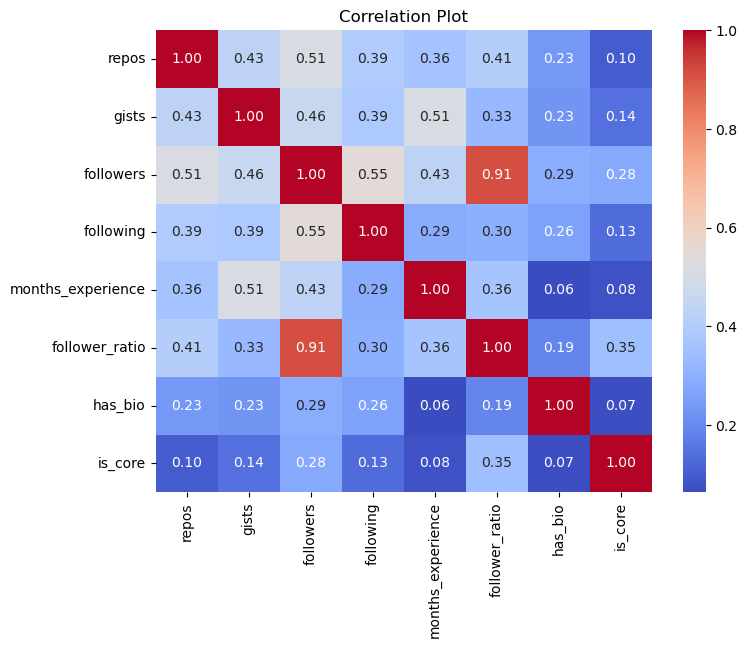

In [134]:
# Calculating the correlation matrix
correlation_matrix = c1_adasyn_log_scaled2.corr()

# Creating a correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Adding a title
plt.title('Correlation Plot')

# Displaying the plot
plt.show() 

repos: 0.4321
gists: 0.2825
followers: 0.4029
following: 0.3679
months_experience: 0.0613
follower_ratio: 0.2377
has_bio: 0.0026


Text(0.5, 1.0, 'Mutual Information of Features')

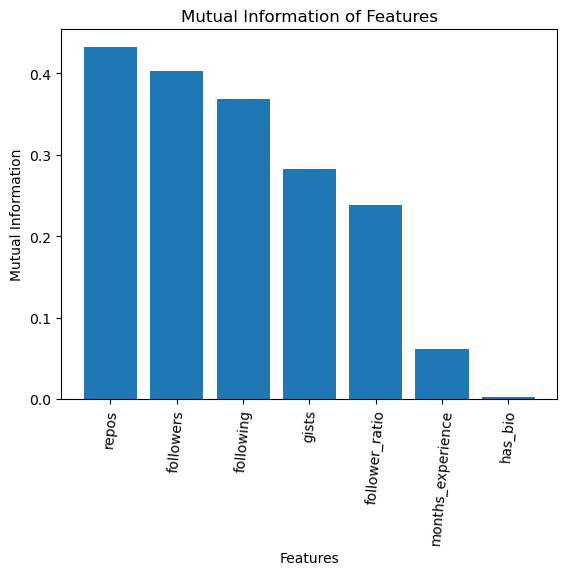

In [136]:
X = c1_adasyn_log_scaled2.drop('is_core', axis=1)
y = c1_adasyn_log_scaled2['is_core']

# Calculating mutual information for each feature
mi_scores = mutual_info_classif(X, y)  # For classification tasks


# Displaying the mutual information scores
for feature, score in zip(X.columns, mi_scores):
    print(f"{feature}: {score:.4f}")
    
sorted_data = [x for _, x in sorted(zip(mi_scores, X.columns), reverse=True)]
sorted_values = sorted(mi_scores, reverse=True)

plt.bar(sorted_data, sorted_values)
plt.xticks(rotation=85) 
plt.xlabel('Features')
plt.ylabel('Mutual Information')
plt.title('Mutual Information of Features')